# Предсказание цены на подержанный автомобиль

In [240]:
# осуществим парсинг трех сайтов с объявлениями о продаже подержанных автомобилей
# сайты auto.ru, drom.ru и avito.ru

In [1]:
import numpy as np
import pandas as pd

In [2]:
# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set.xls', index_col=None, header=None)

In [3]:
auto_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Москва,770000,https://auto.ru/cars/used/sale/kia/rio/1101217...
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Тула,709000,https://auto.ru/cars/used/sale/kia/rio/1101206...
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Калуга,695000,https://auto.ru/cars/used/sale/kia/rio/1101165...
3,Kia Rio III,2015,240000,седан,серый,1.4,107,Бензин,механическая,передний,Левый,Не требует ремонта,3 или более,Оригинал,Растаможен,None,Старая Купавна,350000,https://auto.ru/cars/used/sale/kia/rio/1101242...
4,Kia Rio IV Рестайлинг,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Комплектация Luxe,Тверь,от 846810,https://auto.ru/cars/new/group/kia/rio/2250075...


In [4]:
auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                        'color', 'engine_volume', 'engine_power',
                        'fuel_type', 'transmission', 'drive',
                        'wheel', 'condition', 'owners_count', 
                        'passport', 'customs', 'complectation_type', 
                        'region', 'price', 'link' ]

In [5]:
auto_data.head()

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,drive,wheel,condition,owners_count,passport,customs,complectation_type,region,price,link
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Москва,770000,https://auto.ru/cars/used/sale/kia/rio/1101217...
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Тула,709000,https://auto.ru/cars/used/sale/kia/rio/1101206...
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Калуга,695000,https://auto.ru/cars/used/sale/kia/rio/1101165...
3,Kia Rio III,2015,240000,седан,серый,1.4,107,Бензин,механическая,передний,Левый,Не требует ремонта,3 или более,Оригинал,Растаможен,None,Старая Купавна,350000,https://auto.ru/cars/used/sale/kia/rio/1101242...
4,Kia Rio IV Рестайлинг,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Комплектация Luxe,Тверь,от 846810,https://auto.ru/cars/new/group/kia/rio/2250075...


In [6]:
auto_data.shape

(1221, 19)

In [7]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   model               1221 non-null   object
 1   year                1221 non-null   object
 2   km_age              1221 non-null   object
 3   body_type           1221 non-null   object
 4   color               1221 non-null   object
 5   engine_volume       1221 non-null   object
 6   engine_power        1221 non-null   object
 7   fuel_type           1221 non-null   object
 8   transmission        1221 non-null   object
 9   drive               1221 non-null   object
 10  wheel               1221 non-null   object
 11  condition           1221 non-null   object
 12  owners_count        1221 non-null   object
 13  passport            1221 non-null   object
 14  customs             1221 non-null   object
 15  complectation_type  1221 non-null   object
 16  region              1221

In [8]:
# Уберем предложения от дилеров (новые машины) и оставим только подержанные

auto_data = auto_data.loc[auto_data['year'] != 'None']

In [9]:
auto_data.shape

(1064, 19)

In [10]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [11]:
# Посмотри на уникальные значения типа привода('drive')

auto_data['drive'].unique()

array(['передний'], dtype=object)

In [12]:
# Столбец drive (тип привода) имеет лишь одно уникальное значение "передний", так что его тоже удалим

auto_data.drop(['drive'], axis='columns', inplace=True)

In [13]:
# Посмотрим на расположение руля

auto_data['wheel'].unique()

array(['Левый'], dtype=object)

In [14]:
# Также удалим столбец wheel, т.к.расположение руля у всех автомобилей левое

auto_data.drop(['wheel'], axis='columns', inplace=True)

In [15]:
# Взглянем на сведения о таможне

auto_data['customs'].unique()

array(['Растаможен'], dtype=object)

In [16]:
# Все автомобили растаможены, так что столбец customs можно тоже удалить

auto_data.drop(['customs'], axis='columns', inplace=True)

In [17]:
# Посмотрим уникальные значения столбца о состоянии автомобиля

auto_data['condition'].unique()

array(['Не требует ремонта'], dtype=object)

In [18]:
# Все автомобили не требуют ремонта, удаляем столбец condition

auto_data.drop(['condition'], axis='columns', inplace=True)

In [19]:
# Уникальные значения регионов

auto_data['region'].unique()

array(['Москва', 'Тула', 'Калуга', 'Старая Купавна', 'Тверь', 'Балашиха',
       'Обнинск', 'Рязань', 'Химки', 'Реутов', 'Подольск', 'Коломна',
       'Ярославль', 'Королёв', 'Электросталь', 'Голицыно', 'Иваново',
       'Зеленоград', 'Красногорск', 'Чехов', 'Павловский Посад',
       'Серпухов', 'Собинка', 'Мытищи', 'Карабаново', 'Жуковский',
       'Люберцы', 'Щелково', 'Нахабино', 'Кохма', 'Владимир', 'Клин',
       'Сергиев Посад', 'Белоусово', 'Орехово-Зуево', 'Конаково',
       'Ступино', 'Московский', 'Бронницы', 'Медынь', 'Лосино-Петровский',
       'Малоярославец', 'Ивантеевка', 'Горки', 'Железнодорожный',
       'Воскресенск', 'Ногинск', 'Киржач', 'Дубна', 'Александров',
       'Домодедово', 'Истра', 'Козельск', 'Переславль-Залесский',
       'Лыткарино', 'Малаховка', 'Протвино', 'Егорьевск', 'Куровское',
       'Раменское', 'Кольчугино', 'Удельная', 'Лихославль', 'Камешково',
       'Новый Городок', 'Кабицыно', 'Ковров', 'Ликино-Дулево', 'Пушкино',
       'Дмитров', 'Новопет

In [20]:
# Цены у официальных дилеров одинаковые по стране, поэтому предположим, что владельцы в различных регионах продают
# автомобили ориентируясь на весь общий рынок. Часто покупатель едет за автомобилем в другой регион. Удалим столбец region

auto_data.drop(['region'], axis='columns', inplace=True)

In [21]:
# Посмотрим на различные модификации Kia Rio

auto_data['model'].unique()

array(['Kia Rio IV', 'Kia Rio III Рестайлинг', 'Kia Rio III',
       'Kia Rio  III 4-speed', 'Kia Rio IV X-Line',
       'Kia Rio  III 5-speed', 'Kia Rio I Рестайлинг',
       'Kia Rio II Рестайлинг', 'Kia Rio  III 6-speed', 'Kia Rio II',
       'Kia Rio  I Рестайлинг', 'Kia Rio I', 'Kia Rio  IV',
       'Kia Rio  III Рестайлинг'], dtype=object)

In [22]:
# Количество различных моделей

len(auto_data['model'].unique())

14

In [23]:
# Можно заметить, что некоторые модели повторяются, просто между названием Kia Rio и поколением разное количество пробелов:
# где-то один пробел, а где-то два

In [24]:
# заменим в названиях моделей два пробела подряд одним пробелом, например 'Kia Rio  III' сделаем 'Kia Rio III',
# чтобы уменьшить число категорий признака 'model'

auto_data['model'] = auto_data['model'].str.replace('  ',' ')

In [25]:
# Получилось 11 различных моделей

len(auto_data['model'].unique())

11

In [26]:
# Заменим модели 'Kia Rio III 4-speed', 'Kia Rio III 5-speed', 'Kia Rio III 6-speed' на модель 'Kia Rio III'
# т.к. в данных с других сайтов данная градация отсутствует (мы увидим это позже)

In [27]:
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 4-speed','Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 5-speed','Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 6-speed','Kia Rio III')

In [28]:
auto_data['model'].unique()

array(['Kia Rio IV', 'Kia Rio III Рестайлинг', 'Kia Rio III',
       'Kia Rio IV X-Line', 'Kia Rio I Рестайлинг',
       'Kia Rio II Рестайлинг', 'Kia Rio II', 'Kia Rio I'], dtype=object)

In [29]:
# Уникальные значения столбца с типом комплектации

auto_data['complectation_type'].unique()

array(['Комплектация', 'None', 'Комплектация Prestige AV',
       'Комплектация Comfort Аудио', 'Комплектация Prestige',
       'Комплектация Luxe', 'Комплектация Comfort', 'Комплектация Люкс',
       'Комплектация Luxe FCC', 'Комплектация Luxe RED Line',
       'Комплектация Лига Европы', 'Комплектация Classic',
       'Комплектация Comfort Кондиционер', 'Комплектация Premium',
       'Комплектация Комфорт', 'Комплектация Comfort (без теплых опций)',
       'Комплектация Premium Navi', 'Комплектация Classic Audio',
       'Комплектация Стандарт', 'Комплектация Luxe 2018 FWC'],
      dtype=object)

In [30]:
# Посмотрим количество строк, где тип комплектации отсутствует либо просто стоит одно слово 'Комплектация'

auto_data.loc[(auto_data['complectation_type'] == 'None') | (auto_data['complectation_type'] == 'Комплектация')].shape

(802, 13)

In [31]:
auto_data.shape

(1064, 13)

In [32]:
802 / 1064

0.7537593984962406

In [33]:
# В столбце complectation_type отсутствует почти 75% данных. Его тоже удаляем

auto_data.drop(['complectation_type'], axis='columns', inplace=True)

In [34]:
auto_data.head()

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,серый,1.4,107,Бензин,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,серый,1.4,107,Бензин,механическая,2 владельца,Оригинал,410000


In [35]:
# Уникальные значения сведений о ПТС

auto_data['passport'].unique()

array(['Оригинал', 'Дубликат'], dtype=object)

In [36]:
auto_data.groupby('passport').count()['model']

passport
Дубликат     72
Оригинал    992
Name: model, dtype: int64

In [37]:
# Различные типы кузова

auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.', 'универсал 5 дв.'], dtype=object)

In [38]:
# позиции, где не указана цена

auto_data.loc[auto_data['price'] == 'None']

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,owners_count,passport,price
965,Kia Rio III Рестайлинг,2016,89000,хэтчбек 5 дв.,белый,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,None


In [39]:
# оставим только те данные, где указана цена, т.к. цена является целевым признаком
# Если цена отсутствует - автомобиль уже продан

auto_data = auto_data.loc[auto_data['price'] != 'None']

In [40]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')
auto_data['engine_volume'] = auto_data['engine_volume'].astype('float')

In [41]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 0 to 1220
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model          1063 non-null   object 
 1   year           1063 non-null   int32  
 2   km_age         1063 non-null   int32  
 3   body_type      1063 non-null   object 
 4   color          1063 non-null   object 
 5   engine_volume  1063 non-null   float64
 6   engine_power   1063 non-null   int32  
 7   fuel_type      1063 non-null   object 
 8   transmission   1063 non-null   object 
 9   owners_count   1063 non-null   object 
 10  passport       1063 non-null   object 
 11  price          1063 non-null   int32  
dtypes: float64(1), int32(4), object(7)
memory usage: 91.4+ KB


## Распределение целевого признака (цены)

In [42]:
import seaborn as sns

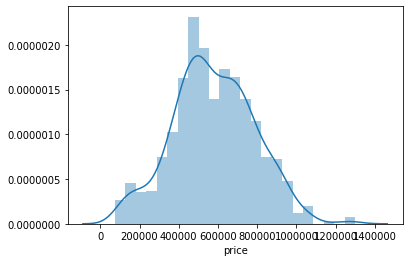

In [43]:
sns.distplot(auto_data['price'])

In [44]:
#skewness and kurtosis
print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.076603
Kurtosis: -0.072519


In [45]:
# распределение цены близко к нормальному

In [46]:
# посмотрим на уникальные значения цветов

auto_data['color'].unique()

array(['белый', 'чёрный', 'серый', 'зелёный', 'бежевый', 'коричневый',
       'серебристый', 'красный', 'оранжевый', 'голубой', 'синий',
       'золотистый', 'жёлтый', 'фиолетовый'], dtype=object)

In [47]:
len(auto_data['color'].unique())

14

In [48]:
# Уникальные значения объемов двигателя

auto_data['engine_volume'].unique()

array([1.6, 1.4, 1.5, 1.3])

In [49]:
# Уникальные значения мощностей двигателя

auto_data['engine_power'].unique()

array([123, 107, 100,  97,  98,  95, 112,  75, 105,  84, 108])

In [50]:
# Уникальные значения типа топлива

auto_data['fuel_type'].unique()

array([' Бензин', ' Бензин, газобаллонное оборудование'], dtype=object)

In [51]:
auto_data['fuel_type'] = auto_data['fuel_type'].str.replace('газобаллонное оборудование','ГБО')

In [52]:
auto_data['fuel_type'].unique()

array([' Бензин', ' Бензин, ГБО'], dtype=object)

In [53]:
# Уникальные значения по количеству владельцев

auto_data['owners_count'].unique()

array(['1 владелец', '3 или более', '2 владельца'], dtype=object)

In [54]:
auto_data.groupby(['year', 'owners_count'])['price', 'km_age'].mean()

C:\Users\user1174\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


price         km_age
year owners_count                              
2000 3 или более    85000.000000  190002.000000
2001 1 владелец     75000.000000  207000.000000
     3 или более    99999.666667  195333.333333
2002 3 или более   133888.777778  198050.000000
2003 1 владелец    149000.000000  230000.000000
     2 владельца   207500.000000  200000.000000
     3 или более   149888.888889  226405.222222
2004 2 владельца   175800.000000  172946.800000
     3 или более   158500.000000  197132.100000
2005 2 владельца   180833.333333  210260.000000
     3 или более   181272.727273  223945.909091
2006 1 владелец    262500.000000  155981.500000
     2 владельца   345000.000000  110000.000000
     3 или более   251571.285714  207160.714286
2007 3 или более   254250.000000  196467.250000
2009 1 владелец    361000.000000  152540.333333
     2 владельца   338671.428571  129719.285714
     3 или более   281111.111111  148500.000000
2010 1 владелец    350340.000000  135773.100000
     2 владельца   372222.222222  117564.555556
     3 или более   337384.615385  157017.153846
2011 1 владелец    415240.000000  129161.400000
     2 владельца   408595.600000  127148.150000
     3 или более   378000.000000  139140.000000
2012 1 владелец    503391.304348  113063.956522
     2 владельца   459892.857143  143219.214286
     3 или более   423095.238095  164480.523810
2013 1 владелец    499095.904762  147495.190476
     2 владельца   472319.758621  130070.172414
     3 или более   449461.538462  145431.692308
2014 1 владелец    531910.975610  105706.365854
     2 владельца   510555.250000  123772.000000
     3 или более   421333.333333  160487.666667
2015 1 владелец    600500.250000   90990.076923
     2 владельца   542934.760870  114460.239130
     3 или более   511461.538462  151831.307692
2016 1 владелец    630936.340659   95387.186813
     2 владельца   588684.782609  108442.673913
     3 или более   515357.142857  139256.428571
2017 1 владелец    726874.659091   68553.984848
     2 владельца   705024.365854   69642.292683
     3 или более   627487.500000   68557.875000
2018 1 владелец    836963.963964   49294.243243
     2 владельца   780363.636364   58019.909091
     3 или более   929000.000000   23450.000000
2019 1 владелец    949773.600000   22305.525000
     2 владельца   927500.000000   41750.000000
2020 1 владелец    900000.000000   20000.000000

In [55]:
# сгруппируем по модельному ряду и посмотрим среднюю цену

auto_data.groupby('model')['price'].mean()

model
Kia Rio I                 118928.428571
Kia Rio I Рестайлинг      167731.707317
Kia Rio II                274951.814815
Kia Rio II Рестайлинг     357171.428571
Kia Rio III               479681.907534
Kia Rio III Рестайлинг    612702.659574
Kia Rio IV                798263.054054
Kia Rio IV X-Line         931360.074074
Name: price, dtype: float64

In [56]:
# сгруппируем по году выпуска и посмотрим среднюю цену

auto_data.groupby('year')['price'].mean()

year
2000     85000.000000
2001     93749.750000
2002    133888.777778
2003    159416.666667
2004    164266.666667
2005    181117.647059
2006    270545.363636
2007    254250.000000
2009    314931.578947
2010    355839.024390
2011    400611.866667
2012    463055.555556
2013    471898.513158
2014    505296.795455
2015    560475.903226
2016    607349.052980
2017    717532.342541
2018    828358.208955
2019    948712.952381
2020    900000.000000
Name: price, dtype: float64

In [57]:
auto_data.groupby(['year', 'passport'])['price'].mean()

year  passport
2000  Оригинал     85000.000000
2001  Дубликат    100000.000000
      Оригинал     91666.333333
2002  Дубликат    167500.000000
      Оригинал    124285.571429
2003  Дубликат    111250.000000
      Оригинал    183500.000000
2004  Дубликат    166000.000000
      Оригинал    163636.363636
2005  Дубликат    183333.333333
      Оригинал    180642.857143
2006  Дубликат    231750.000000
      Оригинал    292714.142857
2007  Дубликат    268500.000000
      Оригинал    240000.000000
2009  Дубликат    249000.000000
      Оригинал    318594.444444
2010  Дубликат    308400.000000
      Оригинал    362427.777778
2011  Дубликат    345000.000000
      Оригинал    407956.830189
2012  Дубликат    443500.000000
      Оригинал    465500.000000
2013  Дубликат    482250.000000
      Оригинал    470680.691176
2014  Дубликат    435000.000000
      Оригинал    509531.542169
2015  Дубликат    560000.000000
      Оригинал    560508.724138
2016  Дубликат    550000.000000
      Оригинал    609722.

## Графики

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [59]:
df = auto_data

In [60]:
# Построим Box Plot по годам выпуска

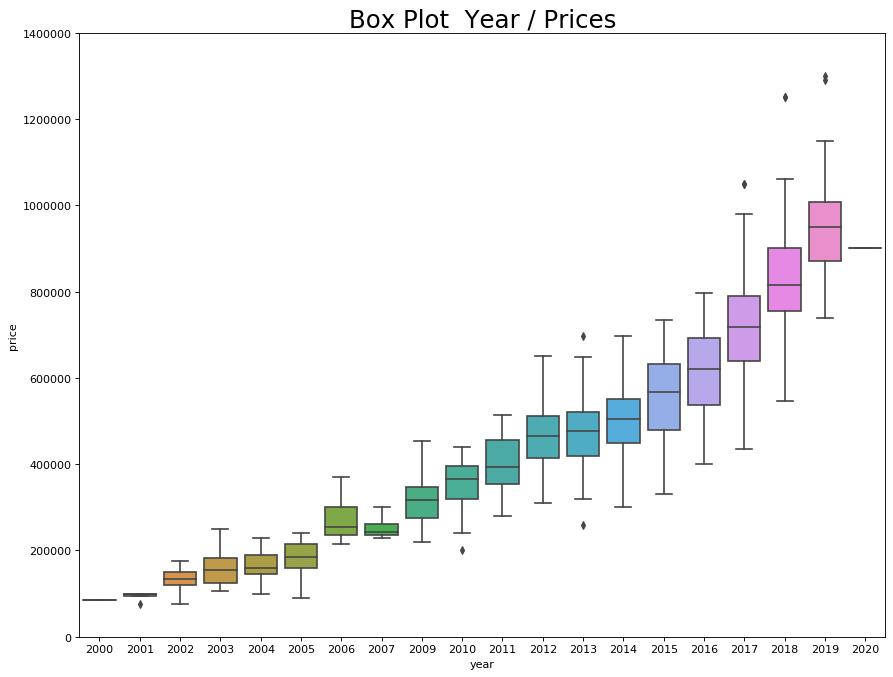

In [61]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [62]:
# На графике присутствуют "выбросы" по цене

In [63]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

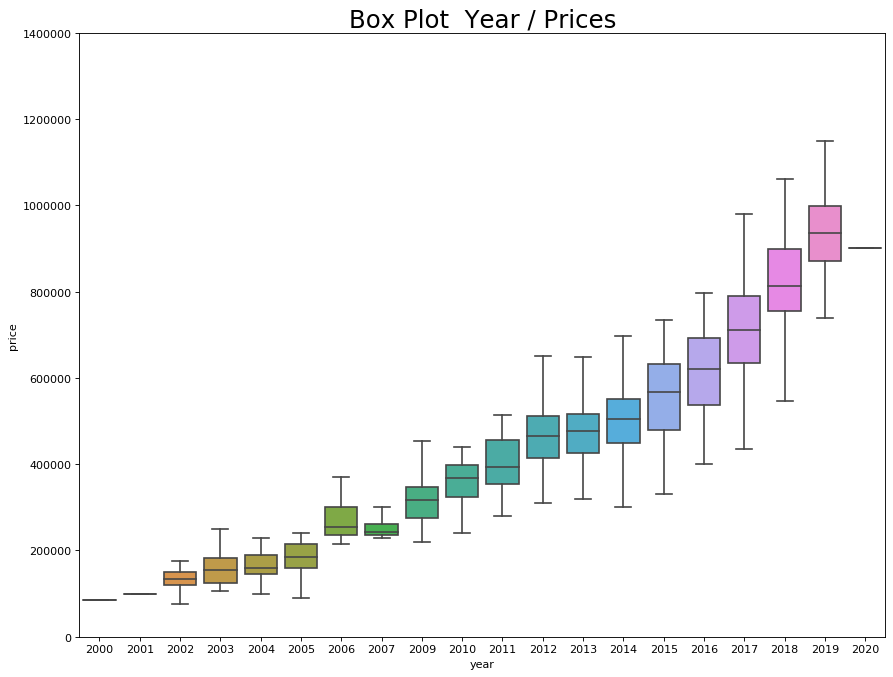

In [64]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [65]:
# как видно из графика, выбросы исчезли

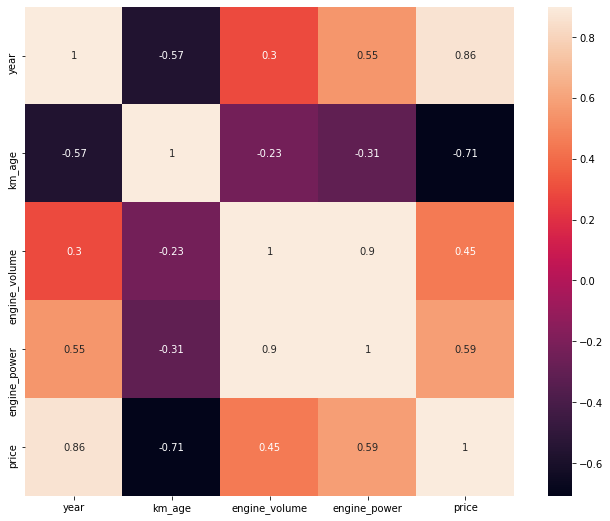

In [66]:
# посмотрим на матрицу корреляций

corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

In [67]:
# На матрице корреляций можно увидеть, что признаки 'engine_volume' и 'engine_power' сильно коррелируют между собой
# действительно, между ними прямая взаимосвязь, чем больше объем двигателя, тем больше мощность.
# удалим 'engine_volume', т.к. при одинаковых объемах двигателя может быть различная мощность у разных поколений автомобилей

In [68]:
df.drop(['engine_volume'], axis='columns', inplace=True)

In [69]:
df.head()

,model,year,km_age,body_type,color,engine_power,fuel_type,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,белый,123,Бензин,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,123,Бензин,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,123,Бензин,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,серый,107,Бензин,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,серый,107,Бензин,механическая,2 владельца,Оригинал,410000


In [70]:
# Посмотрим на столбчатую диаграмму средней цены по годам в зависимости от количества владельцев

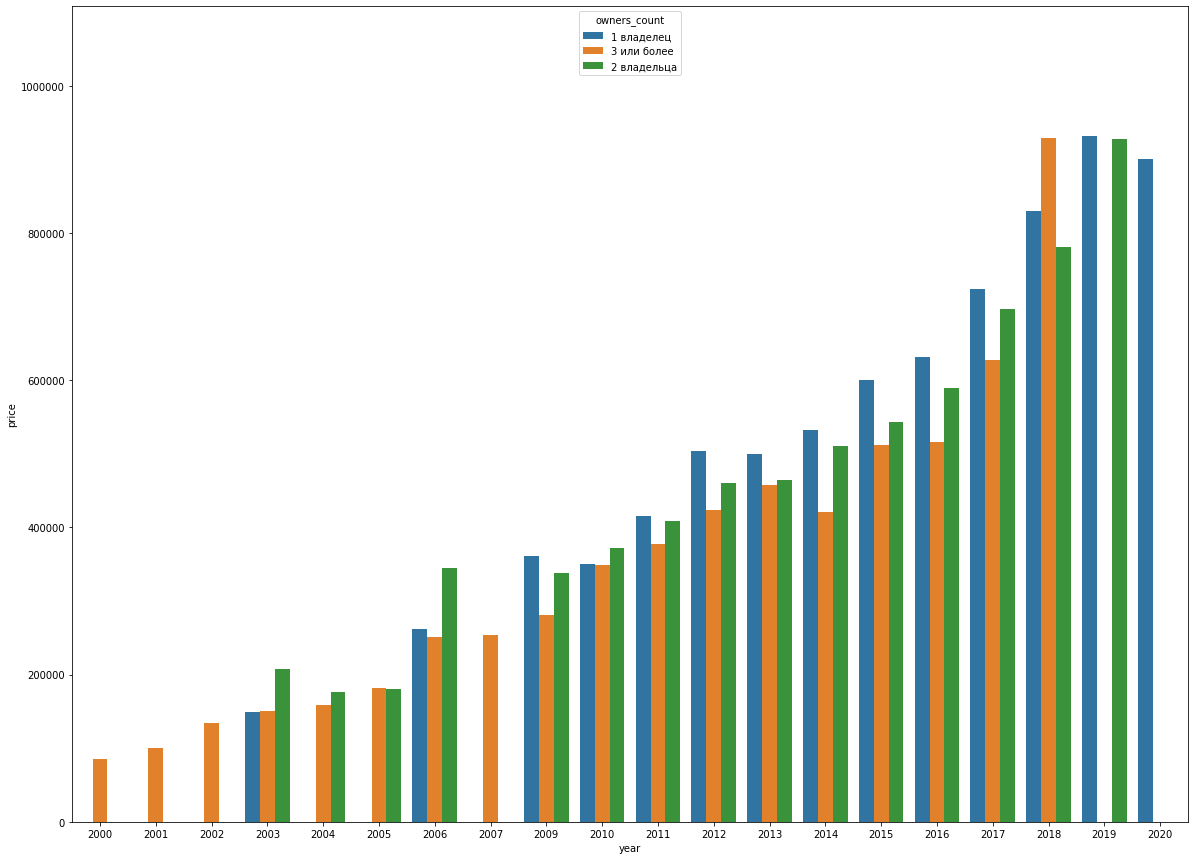

In [71]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='price', hue='owners_count', errwidth=0, data=df)

In [72]:
# В большинстве годов автомобили с одним владельцем стоят дороже, дешевле с двумя и еще дешевле с 3 и более. Это не очень старые
# автомобили, на которые есть хороший спрос.

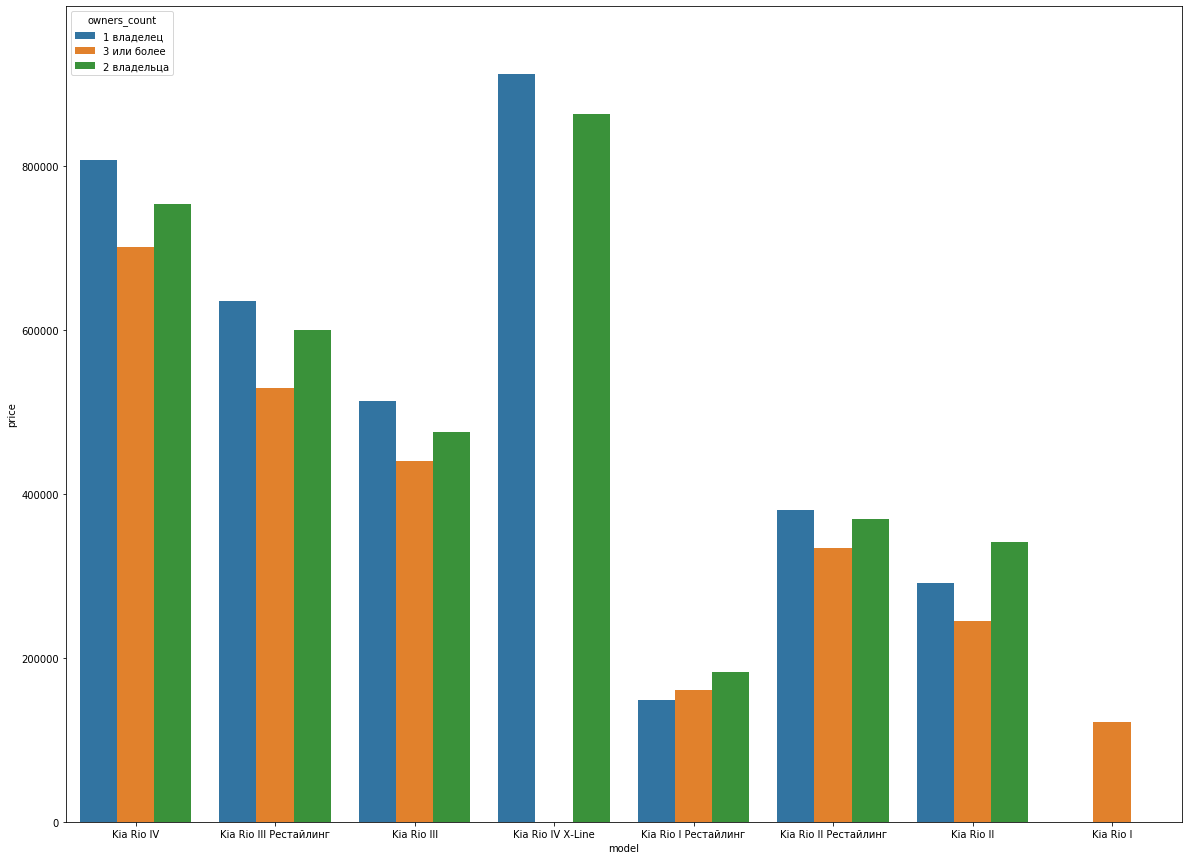

In [73]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='model', y='price', hue='owners_count', errwidth=0, data=df)

In [74]:
# Такая же картина начиная со 2 поколения с рестайлингом.

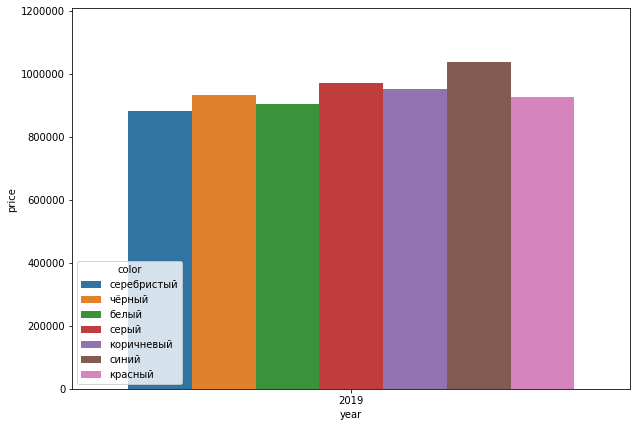

In [75]:
# Цена, в зависимости от цвета

plt.rcParams['figure.figsize']=(10,7)
sns.barplot(x='year', y='price', hue='color', errwidth=0, data=df.loc[df['year'] == 2019])

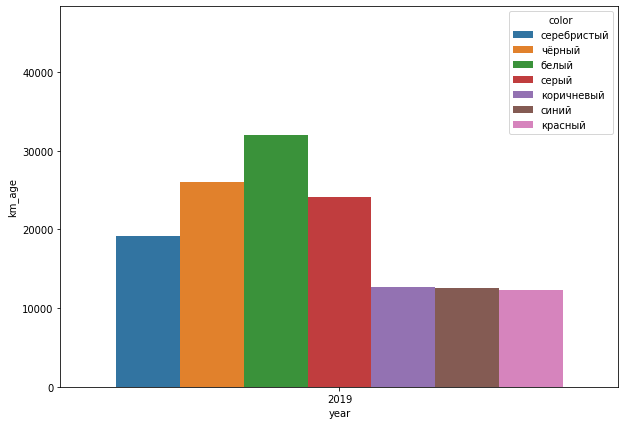

In [76]:
plt.rcParams['figure.figsize']=(10,7)
sns.barplot(x='year', y='km_age', hue='color', errwidth=0, data=df.loc[df['year'] == 2019])

##### На двух последних столбчатых диаграммах мы показали автомобили 2019 года с разбивкой цены по цветам и пробега по цветам.
##### Как видно из этих диаграмм, цвет не влияет на цену (или влияет очень несущественно при прочих равных условиях),
##### например серебристые автомобили 2019 года имеют самую высокую среднюю цену, но при этом у них самый маленький средний пробег.
##### Белые автомобили (3-й столбец), напротив, имеют самую низкую цену, но самый высокий пробег, хотя белый цвет довольно популярный.

In [77]:
# проверим картину для 2018 года

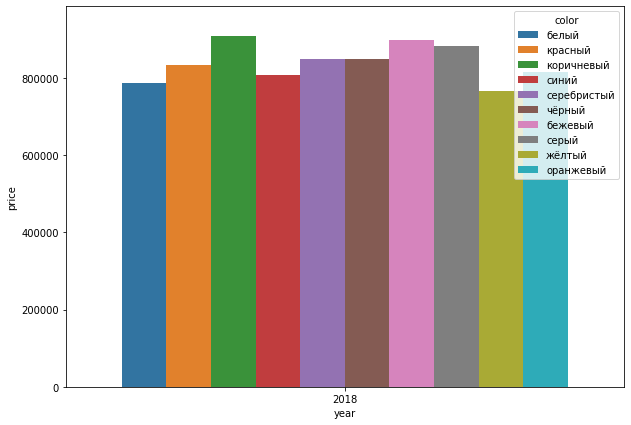

In [78]:
plt.rcParams['figure.figsize']=(10,7)
sns.barplot(x='year', y='price', hue='color', errwidth=0, data=df.loc[df['year'] == 2018])

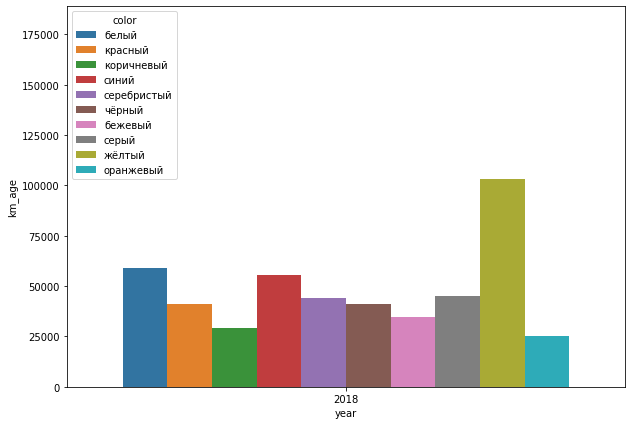

In [79]:
plt.rcParams['figure.figsize']=(10,7)
sns.barplot(x='year', y='km_age', hue='color', errwidth=0, data=df.loc[df['year'] == 2018])

In [80]:
# Картина примерно такая же

In [81]:
# удалим столбец с цветом

df.drop(['color'], axis='columns', inplace=True)

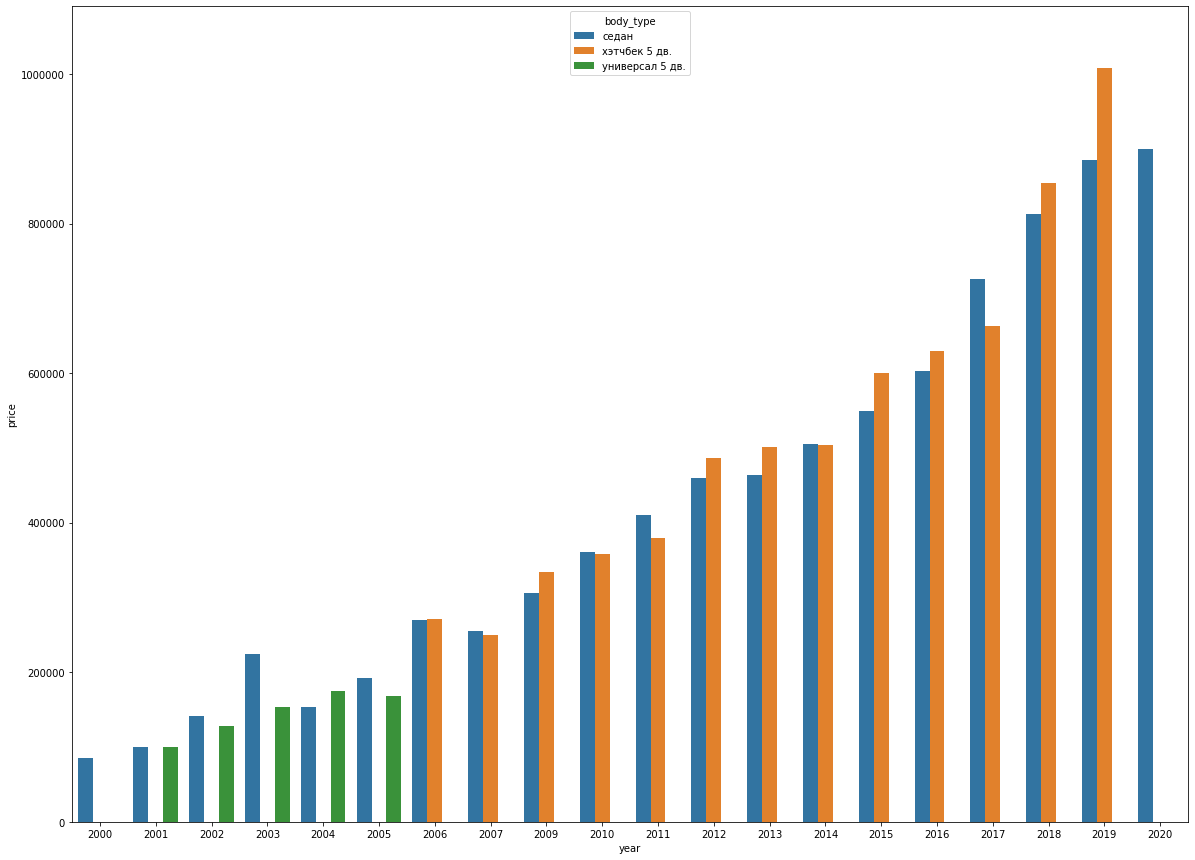

In [82]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='price', hue='body_type', errwidth=0, data=df)

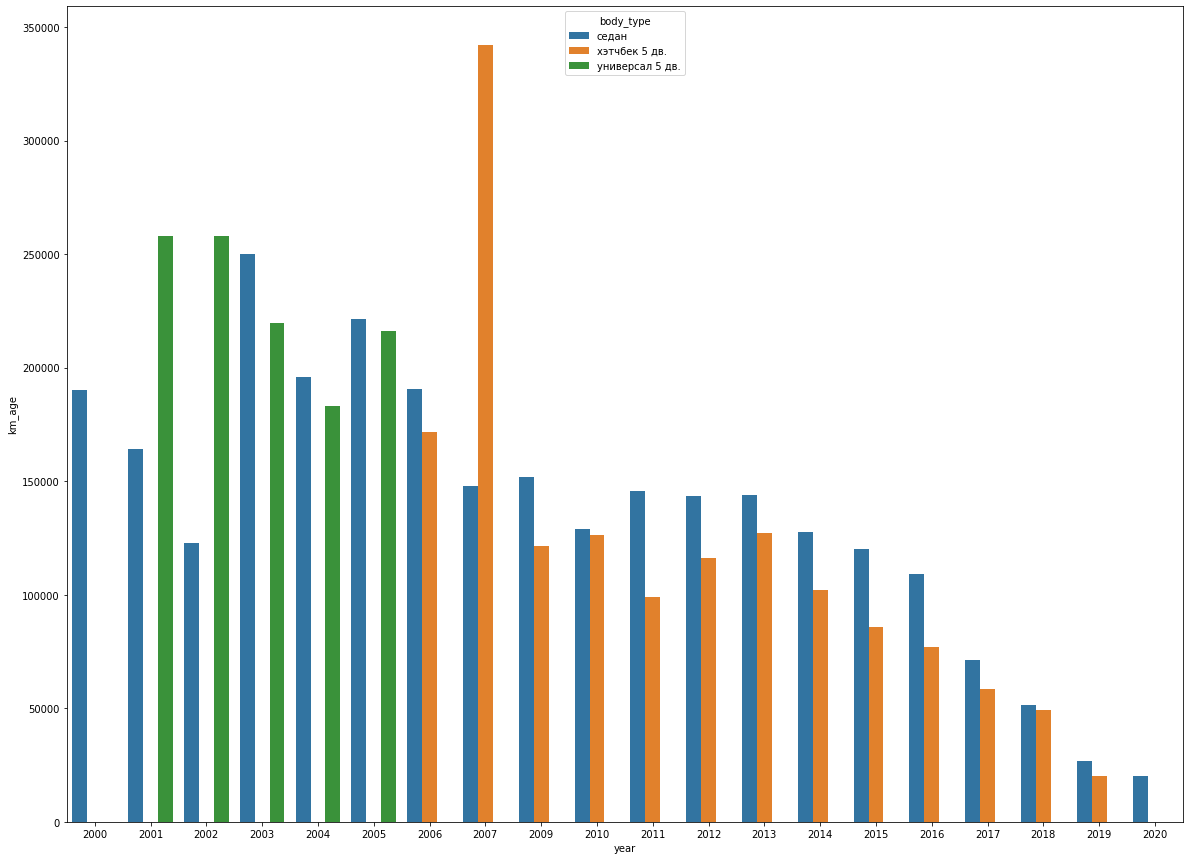

In [83]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='km_age', hue='body_type', errwidth=0, data=df)

In [241]:
# в большинстве годов выпуска хэтчбеки стоили немного дороже седанов
# Но у хэтчбеков был ниже пробег по годам
# Новые хэтчбеки стоят немного дороже седанов, оставим этот признак

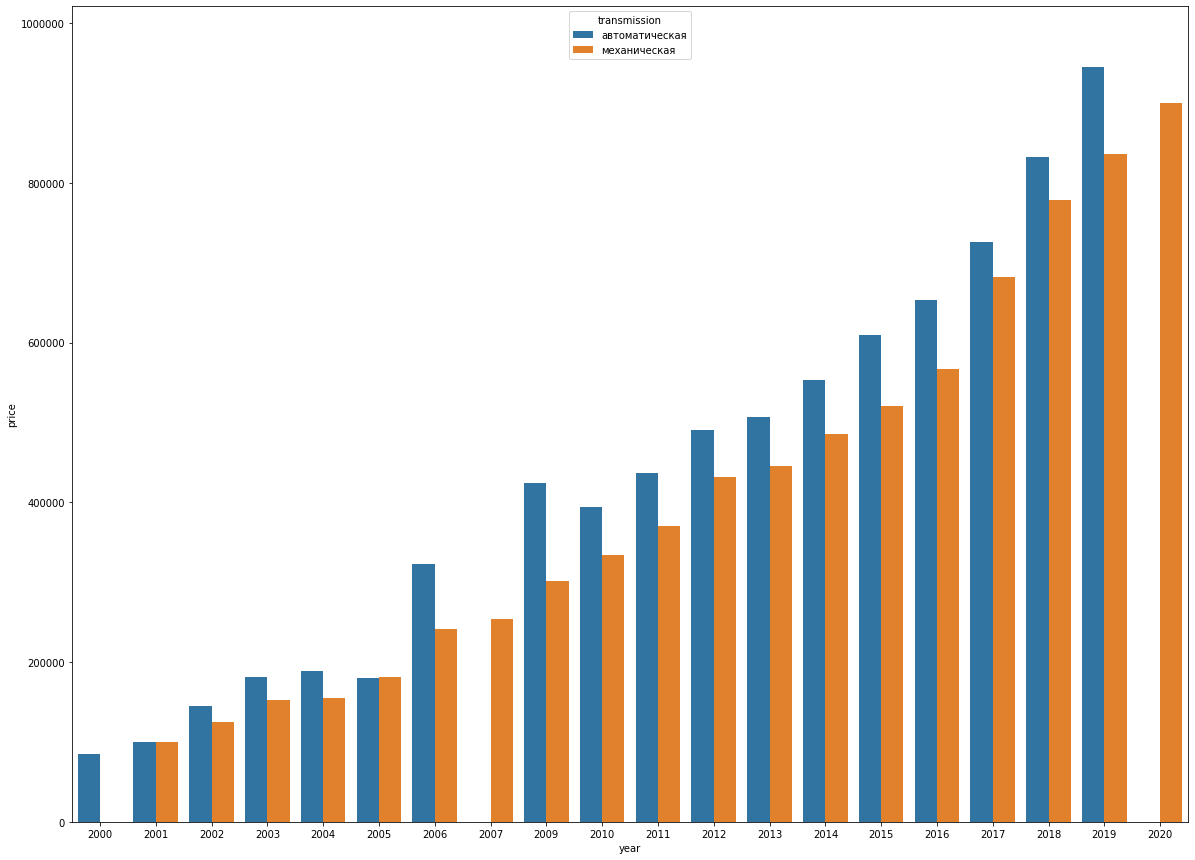

In [85]:
# Диаграмма по типу трансмиссии

plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='price', hue='transmission', errwidth=0, data=df)

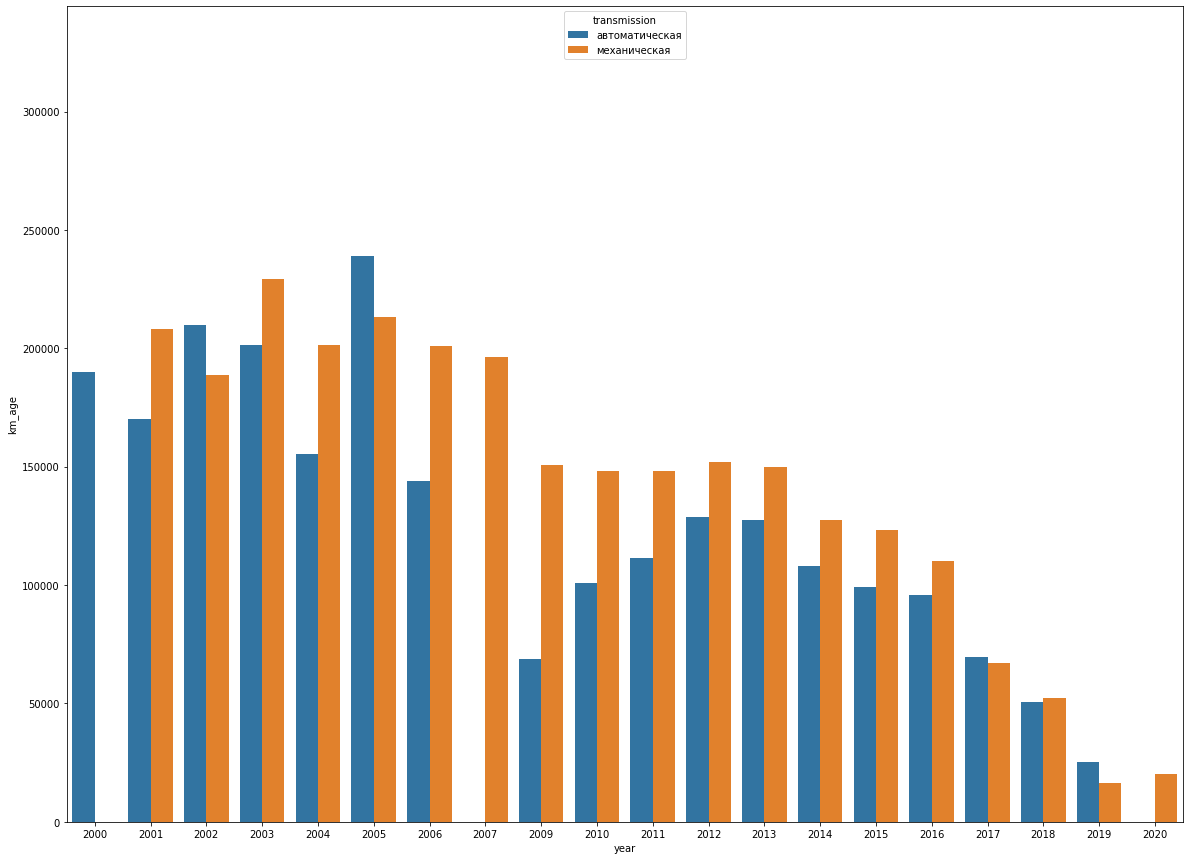

In [86]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='km_age', hue='transmission', errwidth=0, data=df)

In [87]:
# автомобили с автоматической трансмиссией стоят дороже, но средний пробег по годам больше на "механике"
# новые автомобили на автомате стоят дороже, примем допущение, что и на подержанные распространяется такое явление

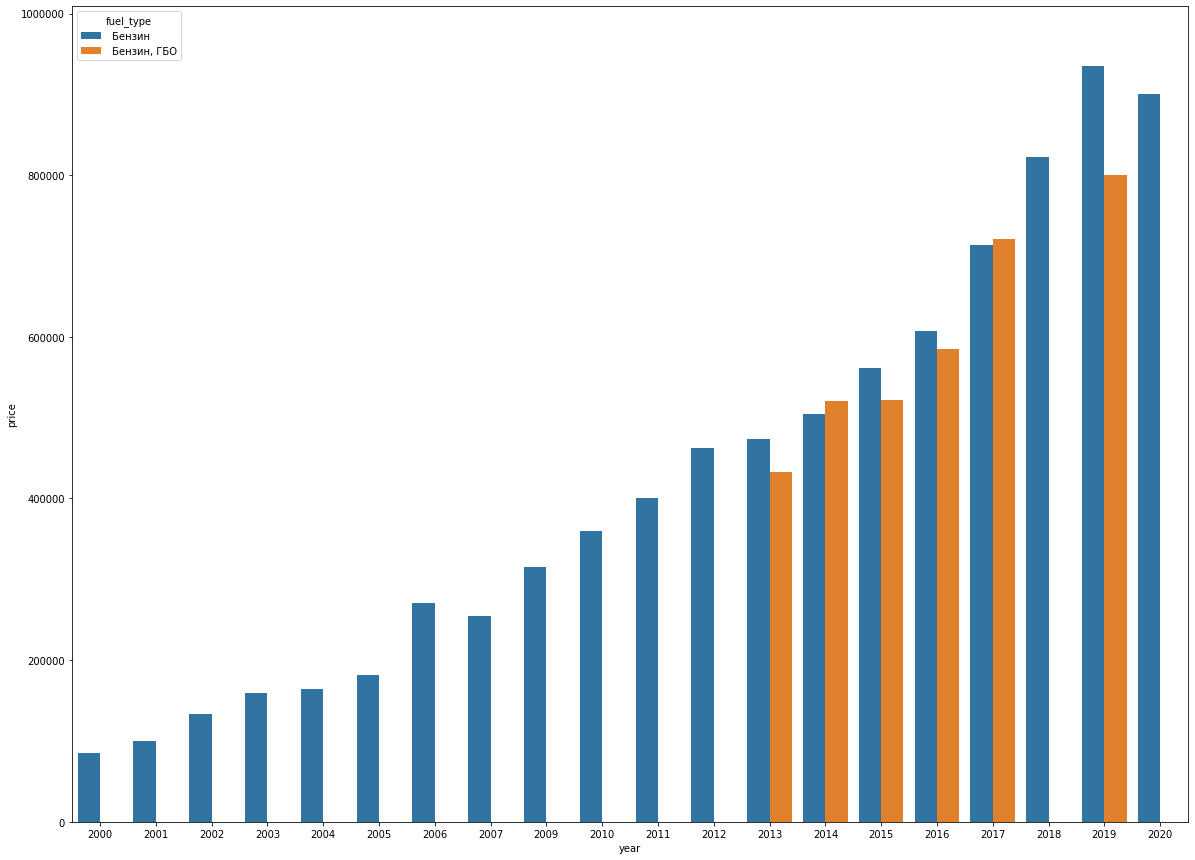

In [88]:
# Диаграммы по типу топлива

plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='price', hue='fuel_type', errwidth=0, data=df)

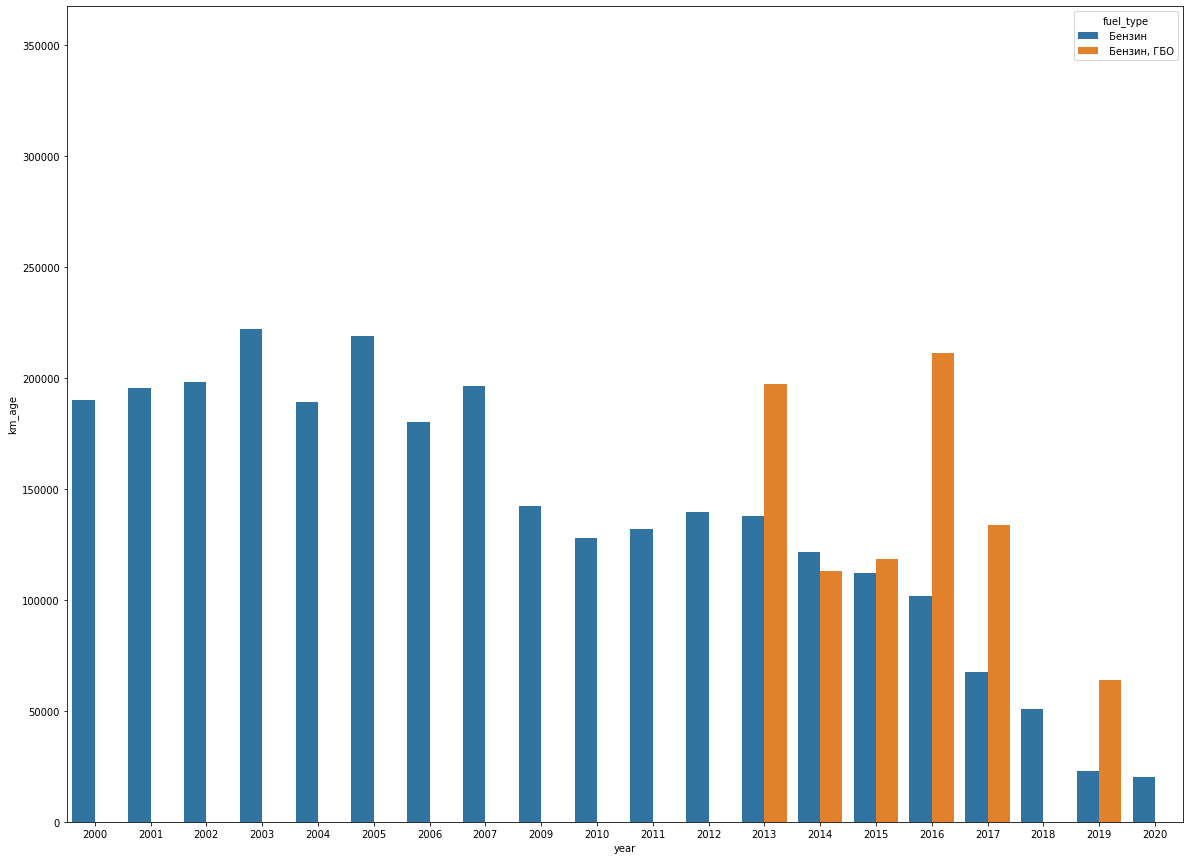

In [89]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='km_age', hue='fuel_type', errwidth=0, data=df)

In [90]:
df.groupby('fuel_type').count()['model']

fuel_type
 Бензин         1039
 Бензин, ГБО      14
Name: model, dtype: int64

In [91]:
# автомобилей, оснащенных ГБО, всего 14 в нашей выборке, 1.3%, это несущественно, тем более из двух последних графиков
# видно, что цена автомобилей с ГБО зависит от пробега

In [92]:
# удалим этот столбец

df.drop(['fuel_type'], axis='columns', inplace=True)

In [93]:
df.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,Оригинал,410000


In [94]:
df.groupby('passport').count()['model']

passport
Дубликат     72
Оригинал    981
Name: model, dtype: int64

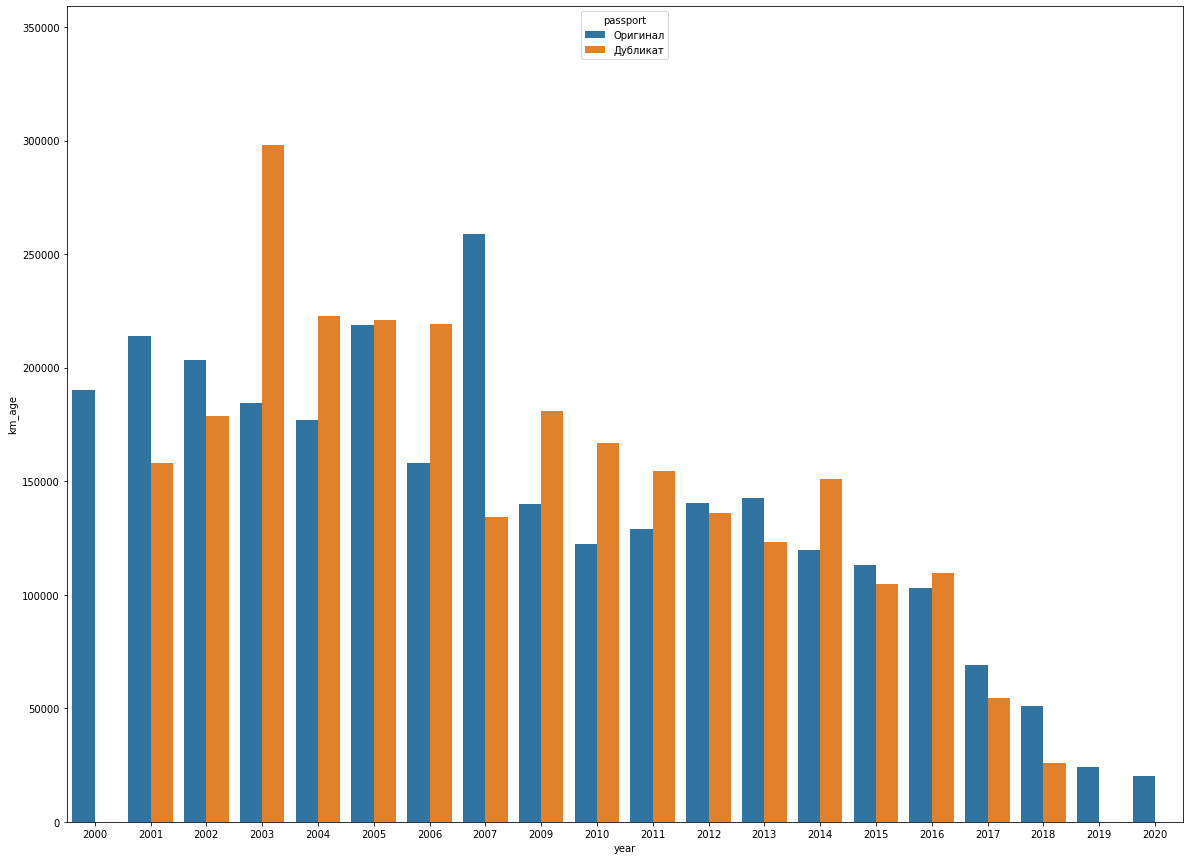

In [95]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='km_age', hue='passport', errwidth=0, data=df)

In [96]:
# дубликат ПТС выдается, когда закончилось место в оригинале, либо при утере/порче. Место может закончиться, если много
# владельцев, причем из дубликата будет не известна информация о предыдущем ПТС - сколько там было владельцев.
# если покупатель будет делать выбор при прочих равных условиях, он выберет автомобиль с оригинальным ПТС


In [97]:
df.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,Оригинал,410000


In [98]:
df.drop(['passport'], axis='columns', inplace=True)

## Алгоритм CatBoost

In [102]:
df.dtypes

model           object
year             int32
km_age           int32
body_type       object
engine_power     int32
transmission    object
owners_count    object
price            int32
dtype: object

### Назначаем X и y

In [103]:
X = df.drop(['price'], axis=1)
y = df['price']

In [242]:
# подберем гиперпараметры регрессора, используя кроссвалидацию

In [104]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 202904.8330483	total: 47.2ms	remaining: 37.7s
1:	learn: 198822.5838106	total: 48.9ms	remaining: 19.5s
2:	learn: 194734.0272126	total: 49.9ms	remaining: 13.3s
3:	learn: 190651.8172453	total: 51.3ms	remaining: 10.2s
4:	learn: 187068.3086859	total: 52.5ms	remaining: 8.35s
5:	learn: 183267.2648967	total: 54.2ms	remaining: 7.17s
6:	learn: 179623.2991640	total: 55.3ms	remaining: 6.27s
7:	learn: 175998.6121255	total: 56.4ms	remaining: 5.58s
8:	learn: 172524.5877578	total: 57.8ms	remaining: 5.08s
9:	learn: 169437.0439895	total: 58.9ms	remaining: 4.65s
10:	learn: 166127.0493623	total: 59.9ms	remaining: 4.3s
11:	learn: 162917.3519487	total: 61.7ms	remaining: 4.05s
12:	learn: 159868.4925273	total: 63.2ms	remaining: 3.82s
13:	learn: 157006.2845891	total: 64.3ms	remaining: 3.61s
14:	learn: 154126.4590758	total: 65.4ms	remaining: 3.42s
15:	learn: 151348.2354156	total: 66.9ms	remaining: 3.28s
16:	learn: 148585.8016626	total: 68.1ms	remaining: 3.13s
17:	learn: 145653.6258101	total: 69.6ms	re

297:	learn: 54303.7425822	total: 352ms	remaining: 594ms
298:	learn: 54294.5840556	total: 354ms	remaining: 593ms
299:	learn: 54268.7104195	total: 355ms	remaining: 592ms
300:	learn: 54259.3005741	total: 356ms	remaining: 590ms
301:	learn: 54240.5211521	total: 357ms	remaining: 589ms
302:	learn: 54233.8480369	total: 358ms	remaining: 587ms
303:	learn: 54221.7271187	total: 359ms	remaining: 586ms
304:	learn: 54212.5435694	total: 360ms	remaining: 584ms
305:	learn: 54163.7401112	total: 362ms	remaining: 584ms
306:	learn: 54157.8314197	total: 363ms	remaining: 583ms
307:	learn: 54153.3325745	total: 364ms	remaining: 582ms
308:	learn: 54150.1465466	total: 365ms	remaining: 579ms
309:	learn: 54145.2197936	total: 366ms	remaining: 578ms
310:	learn: 54136.4300781	total: 367ms	remaining: 577ms
311:	learn: 54132.6585914	total: 368ms	remaining: 575ms
312:	learn: 54114.8953705	total: 369ms	remaining: 574ms
313:	learn: 54093.7500220	total: 370ms	remaining: 573ms
314:	learn: 54070.4072288	total: 371ms	remaining

586:	learn: 51322.7456305	total: 657ms	remaining: 238ms
587:	learn: 51307.8456337	total: 658ms	remaining: 237ms
588:	learn: 51304.1324216	total: 660ms	remaining: 236ms
589:	learn: 51298.3369955	total: 660ms	remaining: 235ms
590:	learn: 51289.4327499	total: 661ms	remaining: 234ms
591:	learn: 51275.5834865	total: 663ms	remaining: 233ms
592:	learn: 51269.7767439	total: 664ms	remaining: 232ms
593:	learn: 51262.0944071	total: 666ms	remaining: 231ms
594:	learn: 51258.1877853	total: 667ms	remaining: 230ms
595:	learn: 51252.8946862	total: 669ms	remaining: 229ms
596:	learn: 51234.2315345	total: 670ms	remaining: 228ms
597:	learn: 51231.7439380	total: 671ms	remaining: 227ms
598:	learn: 51216.2958347	total: 672ms	remaining: 226ms
599:	learn: 51215.7477826	total: 674ms	remaining: 225ms
600:	learn: 51214.7471465	total: 675ms	remaining: 224ms
601:	learn: 51202.1253455	total: 676ms	remaining: 222ms
602:	learn: 51198.7083693	total: 677ms	remaining: 221ms
603:	learn: 51188.6911764	total: 678ms	remaining

736:	learn: 50509.7647393	total: 807ms	remaining: 69ms
737:	learn: 50502.7186796	total: 808ms	remaining: 67.9ms
738:	learn: 50501.6803886	total: 809ms	remaining: 66.8ms
739:	learn: 50499.2973226	total: 810ms	remaining: 65.7ms
740:	learn: 50497.9462816	total: 811ms	remaining: 64.6ms
741:	learn: 50489.9140588	total: 813ms	remaining: 63.5ms
742:	learn: 50486.9781981	total: 814ms	remaining: 62.4ms
743:	learn: 50482.4445826	total: 815ms	remaining: 61.3ms
744:	learn: 50467.1469478	total: 815ms	remaining: 60.2ms
745:	learn: 50461.1477204	total: 817ms	remaining: 59.1ms
746:	learn: 50459.5357905	total: 817ms	remaining: 58ms
747:	learn: 50453.0993053	total: 818ms	remaining: 56.9ms
748:	learn: 50450.2815662	total: 819ms	remaining: 55.8ms
749:	learn: 50430.9125094	total: 820ms	remaining: 54.7ms
750:	learn: 50429.1994832	total: 822ms	remaining: 53.6ms
751:	learn: 50429.0120178	total: 823ms	remaining: 52.5ms
752:	learn: 50426.2879383	total: 824ms	remaining: 51.4ms
753:	learn: 50416.3054060	total: 82

In [105]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=0.5,
                          depth=3)

In [106]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 202904.8330483	total: 3.16ms	remaining: 2.52s
1:	learn: 198822.5838106	total: 5.72ms	remaining: 2.28s
2:	learn: 194734.0272126	total: 7.39ms	remaining: 1.96s
3:	learn: 190651.8172453	total: 10ms	remaining: 1.99s
4:	learn: 187068.3086859	total: 12.6ms	remaining: 2s
5:	learn: 183267.2648967	total: 14.9ms	remaining: 1.97s
6:	learn: 179623.2991640	total: 16.5ms	remaining: 1.86s
7:	learn: 175998.6121255	total: 18ms	remaining: 1.78s
8:	learn: 172524.5877578	total: 20.2ms	remaining: 1.77s
9:	learn: 169437.0439895	total: 21.7ms	remaining: 1.72s
10:	learn: 166127.0493623	total: 23.5ms	remaining: 1.68s
11:	learn: 162917.3519487	total: 26ms	remaining: 1.71s
12:	learn: 159868.4925273	total: 28ms	remaining: 1.7s
13:	learn: 157006.2845891	total: 29.7ms	remaining: 1.67s
14:	learn: 154126.4590758	total: 31.4ms	remaining: 1.64s
15:	learn: 151348.2354156	total: 33.4ms	remaining: 1.64s
16:	learn: 148585.8016626	total: 35ms	remaining: 1.61s
17:	learn: 145653.6258101	total: 37.3ms	remaining: 1.62

217:	learn: 55766.1451738	total: 294ms	remaining: 786ms
218:	learn: 55750.5107980	total: 296ms	remaining: 784ms
219:	learn: 55734.0644088	total: 297ms	remaining: 783ms
220:	learn: 55723.8157049	total: 298ms	remaining: 781ms
221:	learn: 55705.4652497	total: 298ms	remaining: 777ms
222:	learn: 55684.1184372	total: 299ms	remaining: 775ms
223:	learn: 55667.9886397	total: 300ms	remaining: 773ms
224:	learn: 55650.8084005	total: 301ms	remaining: 770ms
225:	learn: 55628.9323879	total: 303ms	remaining: 769ms
226:	learn: 55609.0003989	total: 303ms	remaining: 765ms
227:	learn: 55594.9952304	total: 305ms	remaining: 764ms
228:	learn: 55586.4435536	total: 305ms	remaining: 761ms
229:	learn: 55568.9636431	total: 307ms	remaining: 760ms
230:	learn: 55513.9109513	total: 308ms	remaining: 758ms
231:	learn: 55499.0401538	total: 310ms	remaining: 759ms
232:	learn: 55479.5649316	total: 311ms	remaining: 757ms
233:	learn: 55456.9974902	total: 313ms	remaining: 757ms
234:	learn: 55429.7825906	total: 315ms	remaining

452:	learn: 52462.6549977	total: 587ms	remaining: 449ms
453:	learn: 52461.3073010	total: 588ms	remaining: 448ms
454:	learn: 52455.2459099	total: 589ms	remaining: 447ms
455:	learn: 52448.9820262	total: 590ms	remaining: 445ms
456:	learn: 52441.5483041	total: 591ms	remaining: 444ms
457:	learn: 52440.4154999	total: 592ms	remaining: 442ms
458:	learn: 52408.2826134	total: 593ms	remaining: 441ms
459:	learn: 52404.7978637	total: 594ms	remaining: 439ms
460:	learn: 52394.6028426	total: 595ms	remaining: 437ms
461:	learn: 52390.6797502	total: 596ms	remaining: 436ms
462:	learn: 52377.0204063	total: 598ms	remaining: 435ms
463:	learn: 52374.2340328	total: 599ms	remaining: 434ms
464:	learn: 52369.7204979	total: 600ms	remaining: 432ms
465:	learn: 52363.4443676	total: 601ms	remaining: 431ms
466:	learn: 52361.6602410	total: 602ms	remaining: 429ms
467:	learn: 52355.8661252	total: 603ms	remaining: 427ms
468:	learn: 52348.3550513	total: 604ms	remaining: 426ms
469:	learn: 52344.6695584	total: 606ms	remaining

739:	learn: 50499.2973226	total: 886ms	remaining: 71.8ms
740:	learn: 50497.9462816	total: 887ms	remaining: 70.7ms
741:	learn: 50489.9140588	total: 889ms	remaining: 69.5ms
742:	learn: 50486.9781981	total: 890ms	remaining: 68.3ms
743:	learn: 50482.4445826	total: 891ms	remaining: 67.1ms
744:	learn: 50467.1469478	total: 892ms	remaining: 65.8ms
745:	learn: 50461.1477204	total: 893ms	remaining: 64.6ms
746:	learn: 50459.5357905	total: 894ms	remaining: 63.4ms
747:	learn: 50453.0993053	total: 895ms	remaining: 62.2ms
748:	learn: 50450.2815662	total: 895ms	remaining: 61ms
749:	learn: 50430.9125094	total: 897ms	remaining: 59.8ms
750:	learn: 50429.1994832	total: 898ms	remaining: 58.6ms
751:	learn: 50429.0120178	total: 899ms	remaining: 57.4ms
752:	learn: 50426.2879383	total: 900ms	remaining: 56.2ms
753:	learn: 50416.3054060	total: 902ms	remaining: 55ms
754:	learn: 50409.2226804	total: 903ms	remaining: 53.8ms
755:	learn: 50408.4345810	total: 905ms	remaining: 52.6ms
756:	learn: 50387.9288367	total: 90

In [107]:
# Get predictions
preds = model.predict(X_test)

In [108]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 51335.689292


In [112]:
# Итоговые признаки для работы

df.columns

Index(['model', 'year', 'km_age', 'body_type', 'engine_power', 'transmission',
       'owners_count', 'price'],
      dtype='object')

In [113]:
# создадим фрейм под именем auto_ru_set

auto_ru_set = df

## Теперь поработаем с данными с drom.ru

In [114]:
# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set_DROM.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set_DROM.xls', index_col=None, header=None)

In [115]:
auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                      'engine_power', 'transmission','owners_count', 
                      'price', 'link']

In [116]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [117]:
auto_data.shape

(2000, 8)

In [118]:
auto_data.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,"2 поколение, рестайлинг",2011,125589,седан,95,автомат,1 запись,364000
1,3 поколение,2012,149829,хэтчбек 5 дв.,107,механика,3 записи,375000
2,3 поколение,2014,114900,седан,123,автомат,None,627000
3,"3 поколение, рестайлинг",2016,70000,хэтчбек 5 дв.,107,автомат,2 записи,597000
4,4 поколение,2020,Пробег не указан,седан,123,автомат,None,939900


In [119]:
# Удалим все строки, где отсутствуют данные хотя бы в одном столбце

auto_data = auto_data.loc[auto_data['model'] != 'None']
auto_data = auto_data.loc[auto_data['year'] != 'None']
auto_data = auto_data.loc[auto_data['km_age'] != 'None']
auto_data = auto_data.loc[auto_data['engine_power'] != 'None']
auto_data = auto_data.loc[auto_data['transmission'] != 'None']
auto_data = auto_data.loc[auto_data['owners_count'] != 'None']
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [120]:
auto_data = auto_data.loc[auto_data['km_age'] != 'Пробег не указан']

In [121]:
auto_data.shape

(1236, 8)

In [122]:
auto_data['model'].unique()

array(['2 поколение, рестайлинг', '3 поколение',
       '3 поколение, рестайлинг', '4 поколение',
       '1 поколение, рестайлинг', '2 поколение', '1 поколение'],
      dtype=object)

In [123]:
# Заменим названия модификаций, чтобы они были как в датафрейме с auto.ru

auto_data['model'] = auto_data['model'].str.replace("1 поколение",'Kia Rio I')
auto_data['model'] = auto_data['model'].str.replace("1 поколение, рестайлинг",'Kia Rio I Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("2 поколение",'Kia Rio II')
auto_data['model'] = auto_data['model'].str.replace("2 поколение, рестайлинг",'Kia Rio II Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("3 поколение",'Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace("3 поколение, рестайлинг",'Kia Rio III Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("4 поколение",'Kia Rio IV')

In [124]:
auto_data['model'].unique()

array(['Kia Rio II, рестайлинг', 'Kia Rio III', 'Kia Rio III, рестайлинг',
       'Kia Rio IV', 'Kia Rio I, рестайлинг', 'Kia Rio II', 'Kia Rio I'],
      dtype=object)

In [125]:
# появилась лишняя запятая в названиях, возможно какой-то баг, удалим ее

auto_data['model'] = auto_data['model'].str.replace(",",'')

auto_data['model'] = auto_data['model'].str.replace("рестайлинг",'Рестайлинг')

In [126]:
auto_data['model'].unique()

array(['Kia Rio II Рестайлинг', 'Kia Rio III', 'Kia Rio III Рестайлинг',
       'Kia Rio IV', 'Kia Rio I Рестайлинг', 'Kia Rio II', 'Kia Rio I'],
      dtype=object)

In [127]:
auto_data['transmission'].unique()

array(['автомат', 'механика'], dtype=object)

In [128]:
auto_data['transmission'] = auto_data['transmission'].str.replace('автомат','автоматическая')
auto_data['transmission'] = auto_data['transmission'].str.replace('механика','механическая')

In [129]:
auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.', 'универсал'], dtype=object)

In [130]:
# Значения из первого фрейма

# array(['седан', 'хэтчбек 5 дв.', 'универсал 5 дв.'], dtype=object)

In [131]:
auto_data['body_type'] = auto_data['body_type'].str.replace('универсал','универсал 5 дв.')

In [132]:
auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.', 'универсал 5 дв.'], dtype=object)

In [133]:
# В дата-сете отсутствуют модели X-Line

auto_data.loc[(auto_data['model'] == 'Kia Rio IV') & (auto_data['body_type'] == 'хэтчбек 5 дв.')]

,model,year,km_age,body_type,engine_power,transmission,owners_count,price


In [134]:
# Поменяем записи по количеству владельцев

auto_data['owners_count'] = auto_data['owners_count'].str.replace('1 запись','1 владелец')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('2 записи','2 владельца')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('3 записи','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('4 записи','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('5 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('6 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('7 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('8 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('9 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('10 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('11 записей','3 или более')

In [135]:
auto_data['owners_count'].unique()

array(['1 владелец', '3 или более', '2 владельца'], dtype=object)

In [137]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')

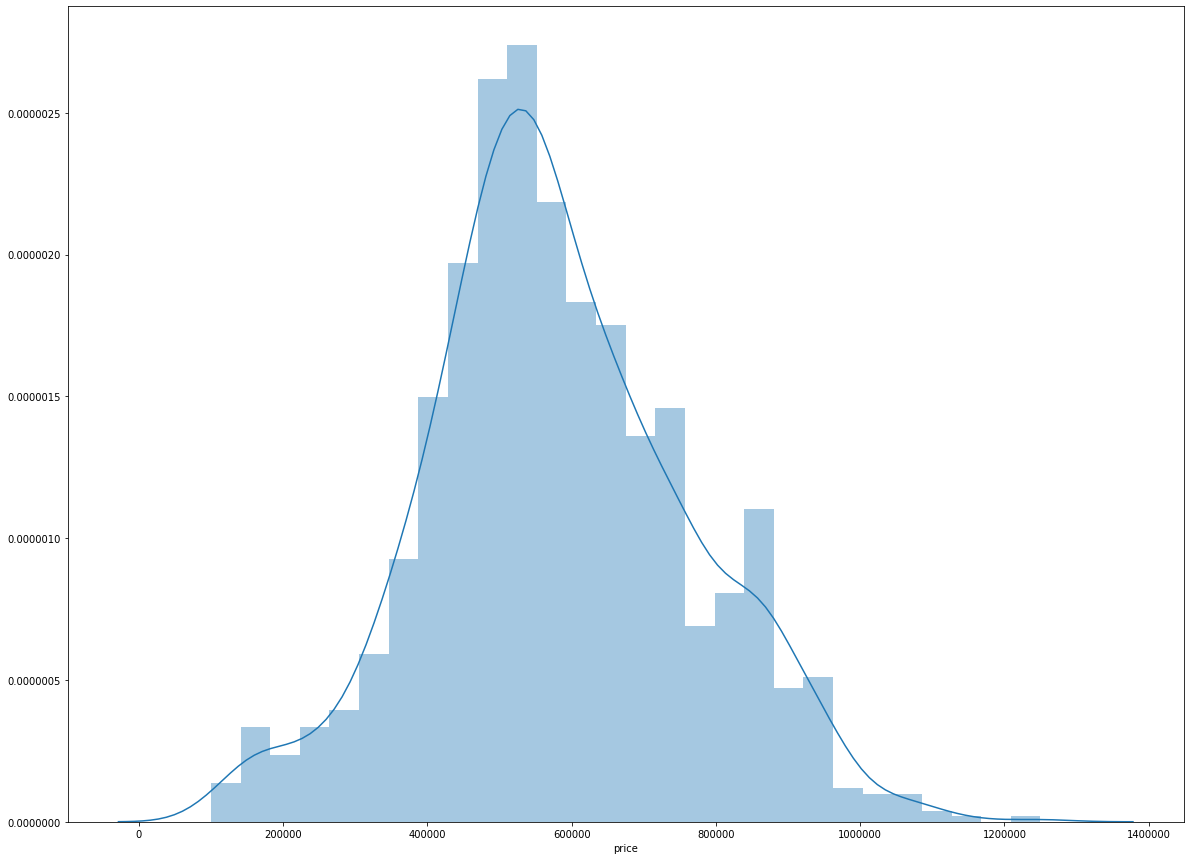

In [138]:
sns.distplot(auto_data['price'])

In [139]:
#skewness and kurtosis
print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.188846
Kurtosis: 0.094796


In [140]:
# Распределение цены близко к нормальному

In [141]:
df = auto_data

In [142]:
df.shape

(1236, 8)

In [243]:
# удалим дубликаты строк

In [143]:
df = df.drop_duplicates()

In [144]:
df.shape

(1233, 8)

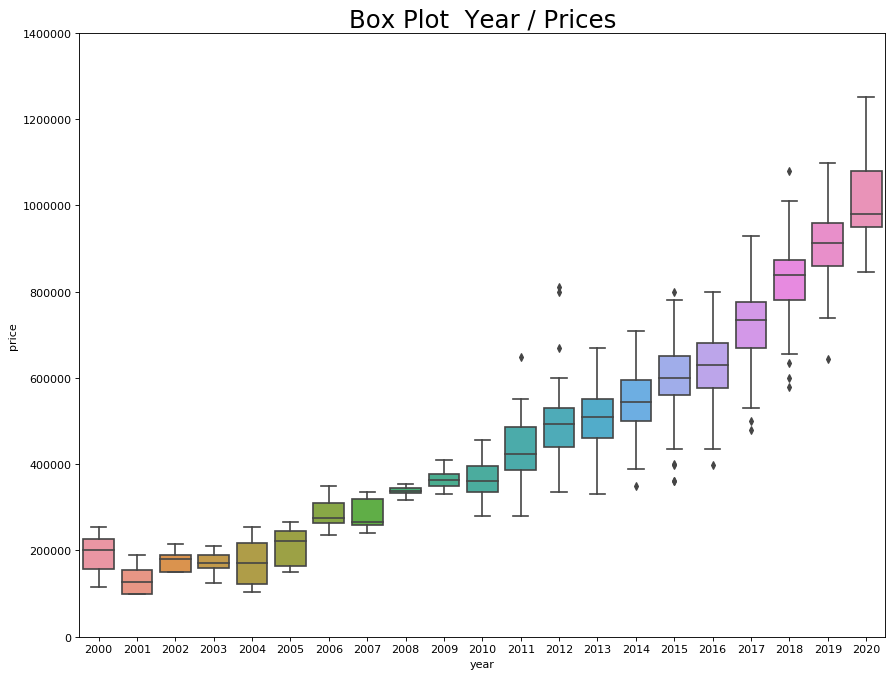

In [145]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [146]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

In [147]:
df.shape

(1215, 8)

In [148]:
# у нас удалилось 18 позиций

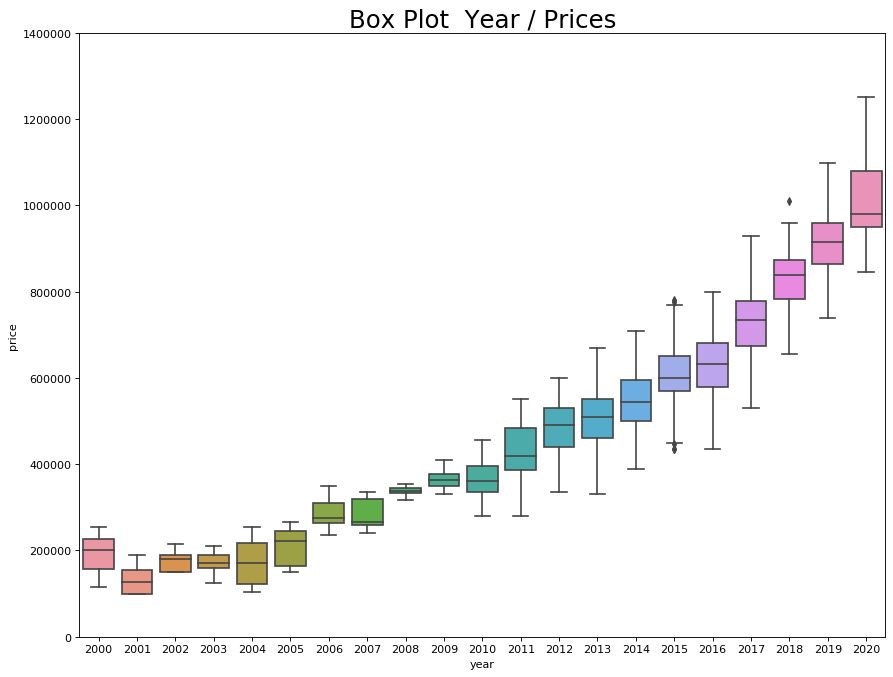

In [149]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [150]:
# удалим еще раз выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

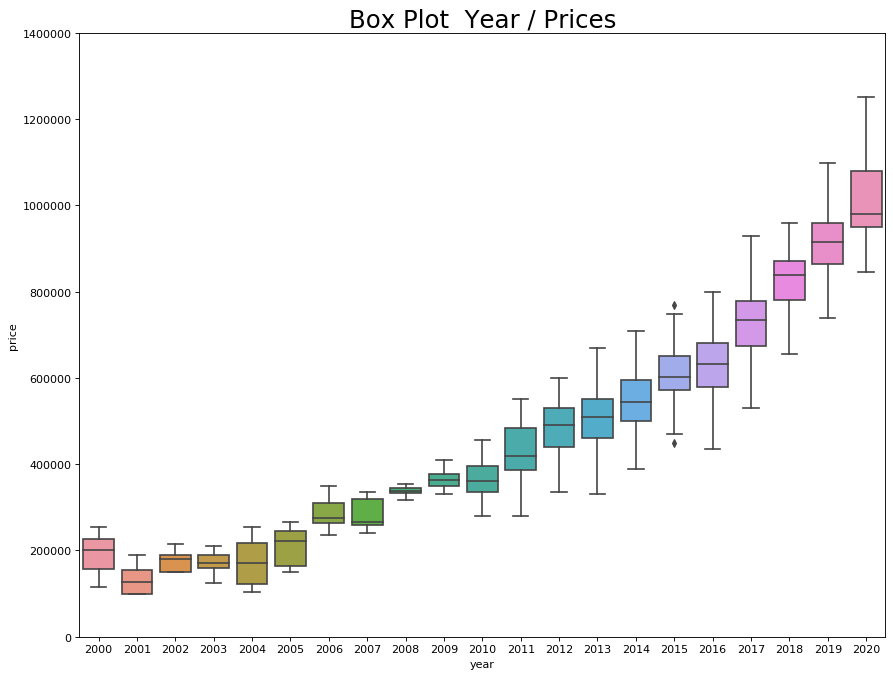

In [151]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [152]:
df.shape

(1209, 8)

In [153]:
# удалим еще раз выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

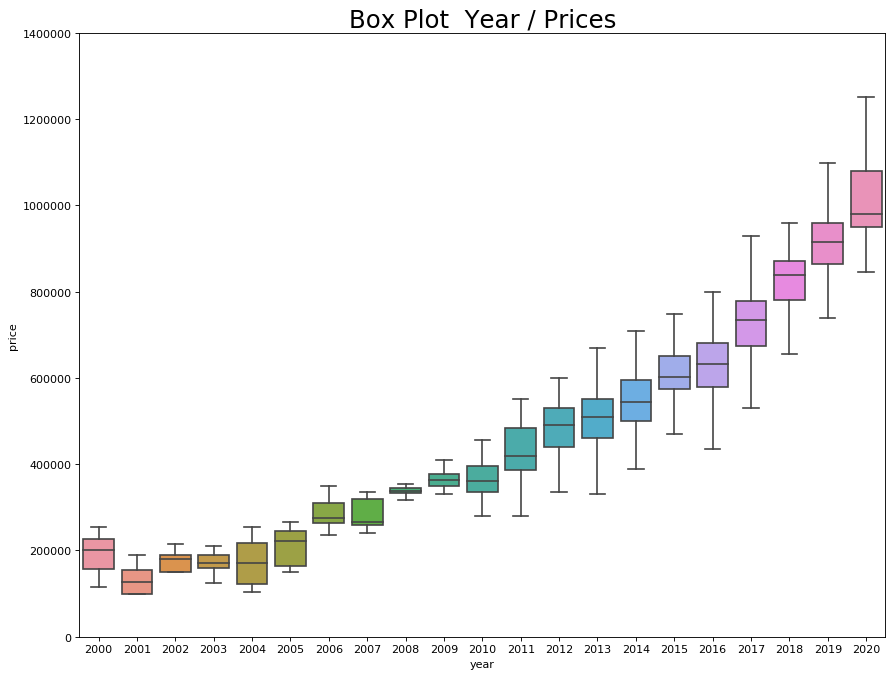

In [154]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [155]:
df.shape

(1207, 8)

## Алгоритм CatBoost

In [156]:
X = df.drop(['price'], axis=1)
y = df['price']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 180209.9329876	total: 2.03ms	remaining: 1.62s
1:	learn: 176306.0982094	total: 3.56ms	remaining: 1.42s
2:	learn: 172328.2907926	total: 5.28ms	remaining: 1.4s
3:	learn: 168951.4990494	total: 6.52ms	remaining: 1.3s
4:	learn: 165138.7008799	total: 8.04ms	remaining: 1.28s
5:	learn: 161852.1737038	total: 8.51ms	remaining: 1.13s
6:	learn: 158826.2723687	total: 9.74ms	remaining: 1.1s
7:	learn: 155526.0054249	total: 10.2ms	remaining: 1.01s
8:	learn: 152381.2609092	total: 11.1ms	remaining: 972ms
9:	learn: 149347.4319253	total: 11.9ms	remaining: 943ms
10:	learn: 146707.8043225	total: 13.2ms	remaining: 945ms
11:	learn: 143693.7665210	total: 14.4ms	remaining: 947ms
12:	learn: 141052.6210456	total: 14.9ms	remaining: 904ms
13:	learn: 138103.1296200	total: 15.8ms	remaining: 886ms
14:	learn: 135501.5747581	total: 16.8ms	remaining: 878ms
15:	learn: 132814.4879035	total: 18ms	remaining: 882ms
16:	learn: 130192.6558983	total: 19.2ms	remaining: 883ms
17:	learn: 127927.7842553	total: 20ms	remainin

318:	learn: 46649.1403720	total: 295ms	remaining: 445ms
319:	learn: 46634.3488781	total: 296ms	remaining: 444ms
320:	learn: 46620.0143940	total: 298ms	remaining: 444ms
321:	learn: 46613.4566226	total: 299ms	remaining: 444ms
322:	learn: 46605.0565078	total: 301ms	remaining: 444ms
323:	learn: 46595.8341186	total: 302ms	remaining: 443ms
324:	learn: 46591.1797496	total: 303ms	remaining: 443ms
325:	learn: 46584.2027266	total: 305ms	remaining: 443ms
326:	learn: 46567.0749378	total: 306ms	remaining: 442ms
327:	learn: 46560.5816783	total: 307ms	remaining: 442ms
328:	learn: 46552.8275224	total: 308ms	remaining: 441ms
329:	learn: 46551.4402043	total: 309ms	remaining: 440ms
330:	learn: 46546.8488964	total: 310ms	remaining: 439ms
331:	learn: 46538.8036580	total: 310ms	remaining: 437ms
332:	learn: 46532.9123670	total: 311ms	remaining: 437ms
333:	learn: 46520.0366743	total: 312ms	remaining: 435ms
334:	learn: 46512.6983938	total: 312ms	remaining: 434ms
335:	learn: 46503.7611763	total: 313ms	remaining

492:	learn: 45408.2930183	total: 445ms	remaining: 277ms
493:	learn: 45403.8271940	total: 446ms	remaining: 276ms
494:	learn: 45398.7323645	total: 447ms	remaining: 276ms
495:	learn: 45391.2994684	total: 448ms	remaining: 275ms
496:	learn: 45386.5672857	total: 449ms	remaining: 274ms
497:	learn: 45381.0815588	total: 450ms	remaining: 273ms
498:	learn: 45373.6516840	total: 452ms	remaining: 272ms
499:	learn: 45357.0271273	total: 452ms	remaining: 271ms
500:	learn: 45339.5356930	total: 453ms	remaining: 270ms
501:	learn: 45337.2357530	total: 454ms	remaining: 270ms
502:	learn: 45330.6002211	total: 455ms	remaining: 269ms
503:	learn: 45327.2345047	total: 456ms	remaining: 268ms
504:	learn: 45318.8873062	total: 459ms	remaining: 268ms
505:	learn: 45315.2716240	total: 459ms	remaining: 267ms
506:	learn: 45311.3783156	total: 460ms	remaining: 266ms
507:	learn: 45309.6037975	total: 461ms	remaining: 265ms
508:	learn: 45307.3583643	total: 462ms	remaining: 264ms
509:	learn: 45299.9883753	total: 463ms	remaining

656:	learn: 44648.4313471	total: 596ms	remaining: 130ms
657:	learn: 44647.9669983	total: 597ms	remaining: 129ms
658:	learn: 44645.6063365	total: 599ms	remaining: 128ms
659:	learn: 44643.9688700	total: 599ms	remaining: 127ms
660:	learn: 44643.4006337	total: 600ms	remaining: 126ms
661:	learn: 44637.0163426	total: 601ms	remaining: 125ms
662:	learn: 44632.2494527	total: 603ms	remaining: 125ms
663:	learn: 44623.8419089	total: 604ms	remaining: 124ms
664:	learn: 44623.4462788	total: 605ms	remaining: 123ms
665:	learn: 44622.2069278	total: 606ms	remaining: 122ms
666:	learn: 44608.2697034	total: 608ms	remaining: 121ms
667:	learn: 44604.9134901	total: 608ms	remaining: 120ms
668:	learn: 44598.5373600	total: 610ms	remaining: 119ms
669:	learn: 44598.1289663	total: 610ms	remaining: 118ms
670:	learn: 44595.5947926	total: 611ms	remaining: 118ms
671:	learn: 44593.0725053	total: 612ms	remaining: 117ms
672:	learn: 44592.0738611	total: 613ms	remaining: 116ms
673:	learn: 44586.4822009	total: 614ms	remaining

In [158]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=0.3,
                          depth=3)

In [159]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 180209.9329876	total: 2.48ms	remaining: 1.98s
1:	learn: 176306.0982094	total: 4.51ms	remaining: 1.8s
2:	learn: 172328.2907926	total: 7.12ms	remaining: 1.89s
3:	learn: 168951.4990494	total: 9.11ms	remaining: 1.81s
4:	learn: 165138.7008799	total: 11.5ms	remaining: 1.83s
5:	learn: 161852.1737038	total: 12.2ms	remaining: 1.61s
6:	learn: 158826.2723687	total: 13.9ms	remaining: 1.57s
7:	learn: 155526.0054249	total: 14.5ms	remaining: 1.43s
8:	learn: 152381.2609092	total: 15.7ms	remaining: 1.38s
9:	learn: 149347.4319253	total: 16.9ms	remaining: 1.33s
10:	learn: 146707.8043225	total: 19.4ms	remaining: 1.39s
11:	learn: 143693.7665210	total: 21.3ms	remaining: 1.4s
12:	learn: 141052.6210456	total: 21.9ms	remaining: 1.33s
13:	learn: 138103.1296200	total: 23.3ms	remaining: 1.31s
14:	learn: 135501.5747581	total: 24.7ms	remaining: 1.29s
15:	learn: 132814.4879035	total: 26.4ms	remaining: 1.29s
16:	learn: 130192.6558983	total: 27.9ms	remaining: 1.29s
17:	learn: 127927.7842553	total: 29ms	remai

237:	learn: 47421.8676648	total: 311ms	remaining: 734ms
238:	learn: 47411.6480076	total: 311ms	remaining: 731ms
239:	learn: 47401.3993940	total: 312ms	remaining: 728ms
240:	learn: 47389.1538153	total: 314ms	remaining: 728ms
241:	learn: 47384.7198624	total: 314ms	remaining: 725ms
242:	learn: 47380.3007367	total: 316ms	remaining: 723ms
243:	learn: 47371.8851725	total: 316ms	remaining: 720ms
244:	learn: 47358.8932986	total: 317ms	remaining: 719ms
245:	learn: 47346.6254663	total: 318ms	remaining: 717ms
246:	learn: 47338.3313120	total: 319ms	remaining: 714ms
247:	learn: 47329.5700435	total: 320ms	remaining: 712ms
248:	learn: 47319.6676354	total: 321ms	remaining: 710ms
249:	learn: 47308.0160215	total: 323ms	remaining: 710ms
250:	learn: 47303.0085937	total: 323ms	remaining: 707ms
251:	learn: 47290.7496690	total: 324ms	remaining: 705ms
252:	learn: 47277.7271569	total: 325ms	remaining: 703ms
253:	learn: 47266.3075306	total: 326ms	remaining: 701ms
254:	learn: 47249.9740614	total: 328ms	remaining

390:	learn: 46131.8614158	total: 462ms	remaining: 483ms
391:	learn: 46129.6031460	total: 463ms	remaining: 482ms
392:	learn: 46088.2098719	total: 464ms	remaining: 481ms
393:	learn: 46084.6344120	total: 465ms	remaining: 479ms
394:	learn: 46079.0321099	total: 466ms	remaining: 478ms
395:	learn: 46071.4148014	total: 467ms	remaining: 477ms
396:	learn: 46067.5264655	total: 468ms	remaining: 475ms
397:	learn: 46063.9710826	total: 469ms	remaining: 473ms
398:	learn: 46058.3761327	total: 470ms	remaining: 472ms
399:	learn: 46049.1863002	total: 471ms	remaining: 471ms
400:	learn: 46046.3782702	total: 471ms	remaining: 469ms
401:	learn: 46042.7397666	total: 473ms	remaining: 468ms
402:	learn: 46035.1494413	total: 473ms	remaining: 466ms
403:	learn: 46024.5813275	total: 475ms	remaining: 465ms
404:	learn: 46012.5437743	total: 475ms	remaining: 464ms
405:	learn: 46008.8457292	total: 477ms	remaining: 463ms
406:	learn: 45978.8063177	total: 478ms	remaining: 462ms
407:	learn: 45971.2794345	total: 480ms	remaining

544:	learn: 45153.8623494	total: 611ms	remaining: 286ms
545:	learn: 45148.4862038	total: 612ms	remaining: 285ms
546:	learn: 45146.1073524	total: 613ms	remaining: 284ms
547:	learn: 45142.1673131	total: 614ms	remaining: 283ms
548:	learn: 45125.8115455	total: 616ms	remaining: 281ms
549:	learn: 45109.0072833	total: 617ms	remaining: 280ms
550:	learn: 45103.5135422	total: 617ms	remaining: 279ms
551:	learn: 45096.4465272	total: 619ms	remaining: 278ms
552:	learn: 45096.3841412	total: 620ms	remaining: 277ms
553:	learn: 45092.8349068	total: 620ms	remaining: 275ms
554:	learn: 45090.4407751	total: 621ms	remaining: 274ms
555:	learn: 45088.1346639	total: 623ms	remaining: 274ms
556:	learn: 45086.0041087	total: 625ms	remaining: 272ms
557:	learn: 45083.5745210	total: 626ms	remaining: 271ms
558:	learn: 45081.3748107	total: 627ms	remaining: 270ms
559:	learn: 45074.7483285	total: 629ms	remaining: 269ms
560:	learn: 45070.2330702	total: 630ms	remaining: 268ms
561:	learn: 45067.8867080	total: 631ms	remaining

702:	learn: 44413.4310468	total: 761ms	remaining: 105ms
703:	learn: 44410.4656066	total: 762ms	remaining: 104ms
704:	learn: 44405.6754851	total: 763ms	remaining: 103ms
705:	learn: 44404.5737424	total: 764ms	remaining: 102ms
706:	learn: 44403.6117118	total: 765ms	remaining: 101ms
707:	learn: 44400.1566114	total: 766ms	remaining: 99.5ms
708:	learn: 44394.5093012	total: 767ms	remaining: 98.5ms
709:	learn: 44393.1799390	total: 768ms	remaining: 97.3ms
710:	learn: 44392.7871494	total: 769ms	remaining: 96.2ms
711:	learn: 44392.6951104	total: 771ms	remaining: 95.2ms
712:	learn: 44390.5874928	total: 772ms	remaining: 94.2ms
713:	learn: 44388.6408248	total: 774ms	remaining: 93.2ms
714:	learn: 44385.0763320	total: 776ms	remaining: 92.2ms
715:	learn: 44382.2404688	total: 777ms	remaining: 91.2ms
716:	learn: 44379.5501146	total: 779ms	remaining: 90.1ms
717:	learn: 44376.7581695	total: 780ms	remaining: 89.1ms
718:	learn: 44376.7294096	total: 781ms	remaining: 87.9ms
719:	learn: 44375.9941545	total: 782

In [160]:
# Get predictions
preds = model.predict(X_test)

In [161]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 48058.520209


In [162]:
# создадим фрейм под именем drom_ru_set

drom_ru_set = df

## Поработаем с данными с avito.ru

In [163]:
# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set_Avito.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set_Avito.xls', index_col=None, header=None)

In [164]:
auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                      'engine_power', 'transmission','owners_count', 
                      'condition', 'price', 'link' ]

In [165]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [166]:
auto_data.shape

(4707, 9)

In [167]:
# Удалим все строки, где отсутствуют данные хотя бы в одном столбце

auto_data = auto_data.loc[auto_data['model'] != 'None']
auto_data = auto_data.loc[auto_data['year'] != 'None']
auto_data = auto_data.loc[auto_data['km_age'] != 'None']
auto_data = auto_data.loc[auto_data['engine_power'] != 'None']
auto_data = auto_data.loc[auto_data['transmission'] != 'None']
auto_data = auto_data.loc[auto_data['owners_count'] != 'None']
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [168]:
auto_data.shape

(4328, 9)

In [169]:
auto_data['transmission'].unique()

array(['автомат', 'механика'], dtype=object)

In [170]:
auto_data['transmission'] = auto_data['transmission'].str.replace('автомат','автоматическая')
auto_data['transmission'] = auto_data['transmission'].str.replace('механика','механическая')

In [171]:
auto_data['condition'].unique()

array(['не битый', 'битый'], dtype=object)

In [172]:
auto_data.groupby('condition').count()['model']

condition
битый        108
не битый    4220
Name: model, dtype: int64

In [173]:
# итого 108 битых автомобилей. Удалим их

auto_data = auto_data.loc[auto_data['condition'] != 'битый']

In [174]:
# Теперь можно удалить столбец 'condition'

auto_data.drop(['condition'], axis='columns', inplace=True)

In [175]:
auto_data['model'].unique()

array(['II рестайлинг', 'II', 'III', 'IV', 'III рестайлинг',
       'I рестайлинг', 'I', 'IV рестайлинг'], dtype=object)

In [176]:
auto_data['model'] = 'Kia Rio ' + auto_data['model']

In [177]:
auto_data['model'] = auto_data['model'].str.replace('рестайлинг','Рестайлинг')

In [178]:
auto_data['model'].unique()

array(['Kia Rio II Рестайлинг', 'Kia Rio II', 'Kia Rio III', 'Kia Rio IV',
       'Kia Rio III Рестайлинг', 'Kia Rio I Рестайлинг', 'Kia Rio I',
       'Kia Rio IV Рестайлинг'], dtype=object)

In [179]:
auto_data['owners_count'].unique()

array(['3', '2', '4+', '1'], dtype=object)

In [180]:
auto_data['owners_count'] = auto_data['owners_count'].str.replace('3','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('1','1 владелец')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('2','2 владельца')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('4+','3 или более')

In [181]:
auto_data['owners_count'].unique()

array(['3 или более', '2 владельца', '3 или более+', '1 владелец'],
      dtype=object)

In [182]:
auto_data['owners_count'] = auto_data['owners_count'].str.replace('+','')

In [183]:
auto_data['owners_count'].unique()

array(['3 или более', '2 владельца', '1 владелец'], dtype=object)

In [185]:
auto_data['body_type'].unique()

array(['седан', 'хетчбэк'], dtype=object)

In [186]:
# Значения из первого фрейма

# array(['седан', 'хэтчбек 5 дв.', 'универсал 5 дв.'], dtype=object)

In [187]:
auto_data['body_type'] = auto_data['body_type'].str.replace('хетчбэк','хэтчбек 5 дв.')

In [188]:
auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.'], dtype=object)

In [189]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')

In [190]:
auto_data.shape

(4220, 8)

In [191]:
# удалим дубликаты

auto_data = auto_data.drop_duplicates()

In [192]:
# удалим новые автомобили (с очень маленьким пробегом)

auto_data = auto_data.loc[auto_data['km_age'] > 150]

In [193]:
auto_data.shape

(4024, 8)

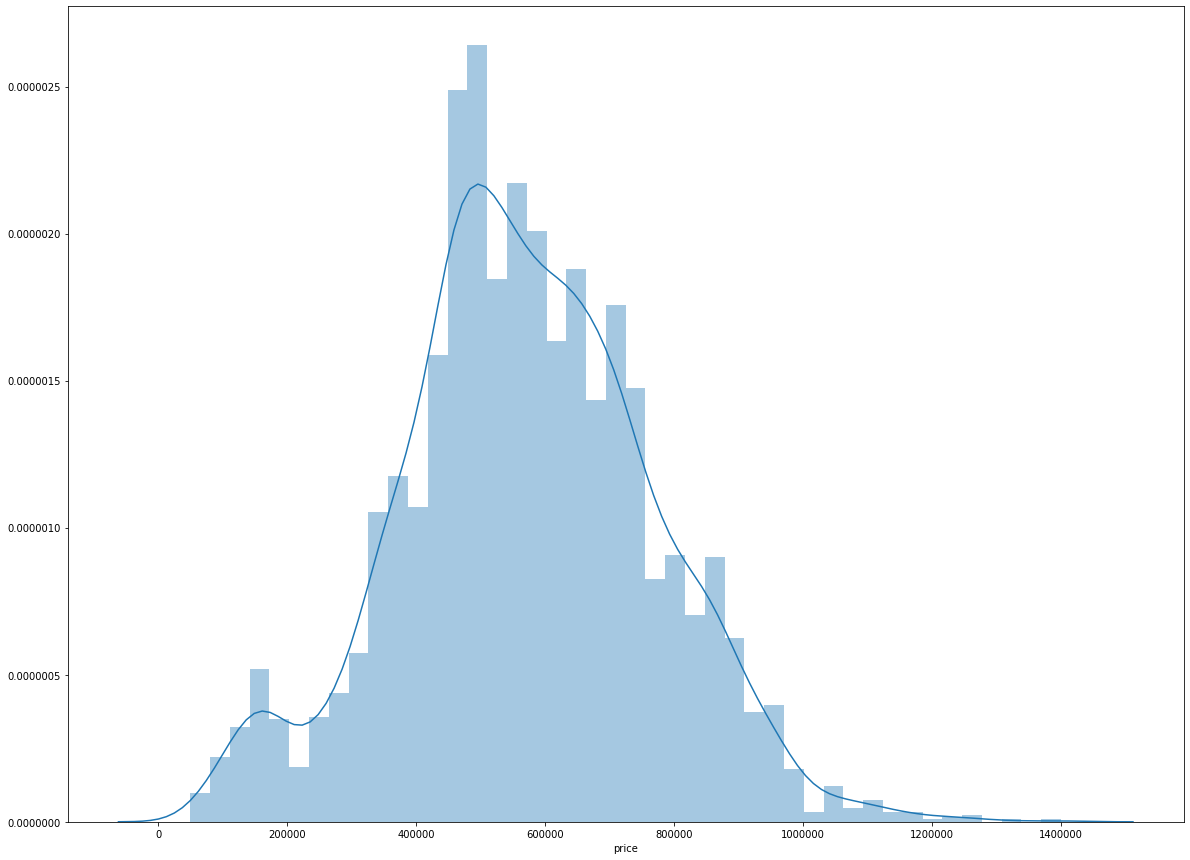

In [194]:
sns.distplot(auto_data['price'])

In [195]:
#skewness and kurtosis
print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.073959
Kurtosis: 0.162472


## Графики

In [196]:
df = auto_data

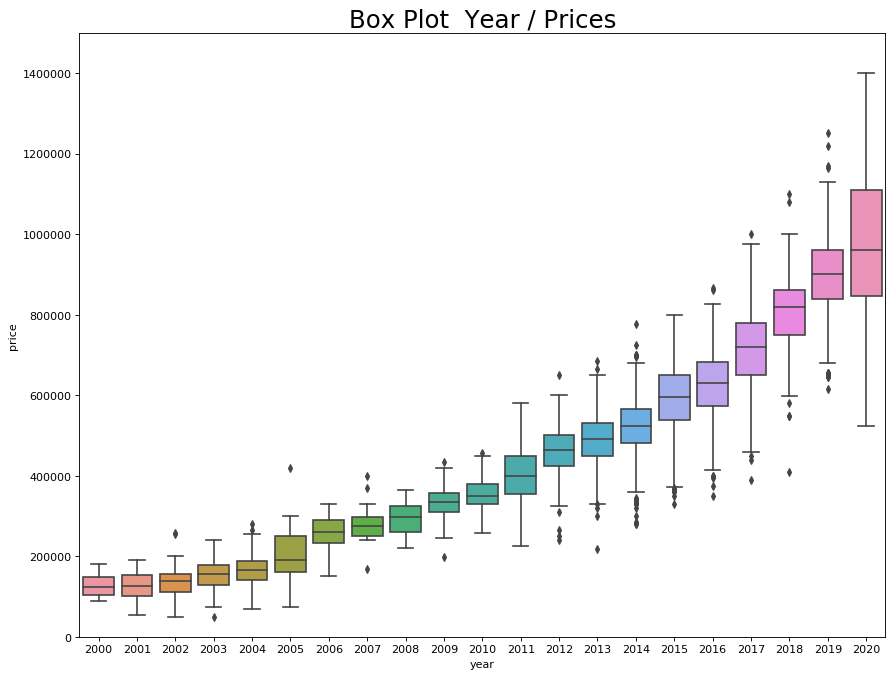

In [197]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [198]:
df.shape

(4024, 8)

In [199]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

In [200]:
df.shape

(3950, 8)

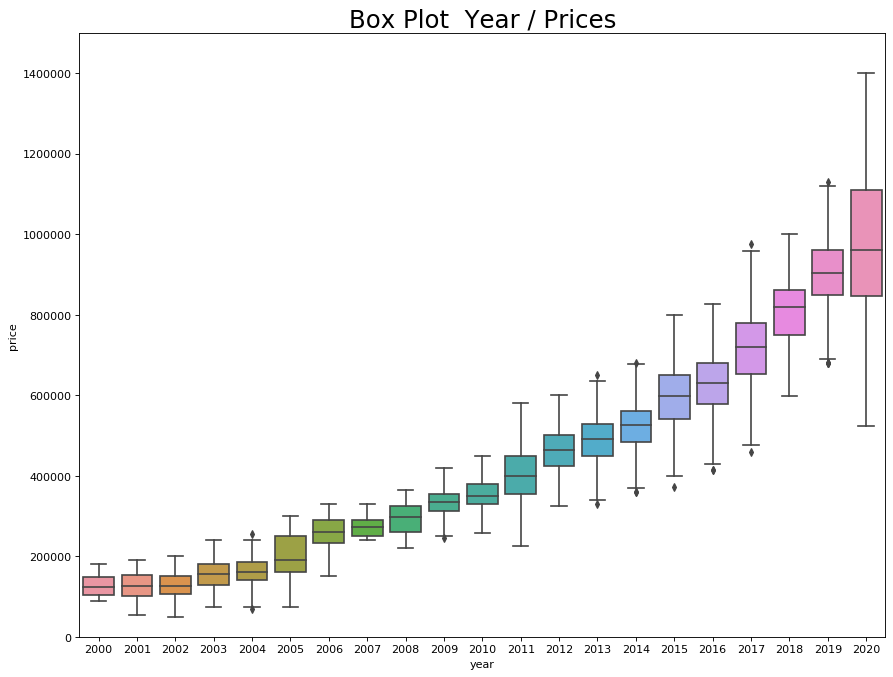

In [201]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [202]:
# удалим еще раз выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

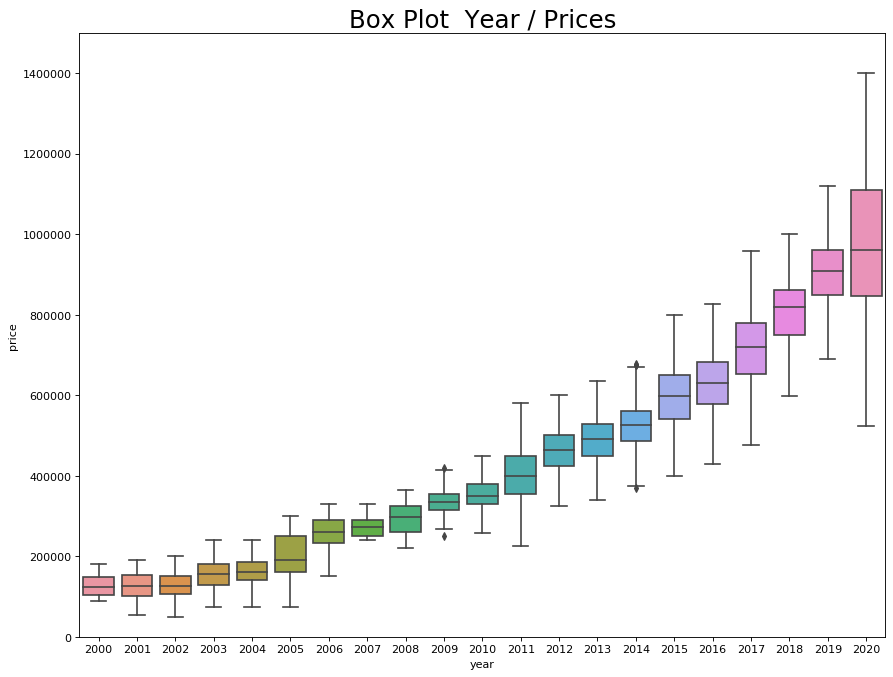

In [203]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [204]:
# удалим еще раз выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

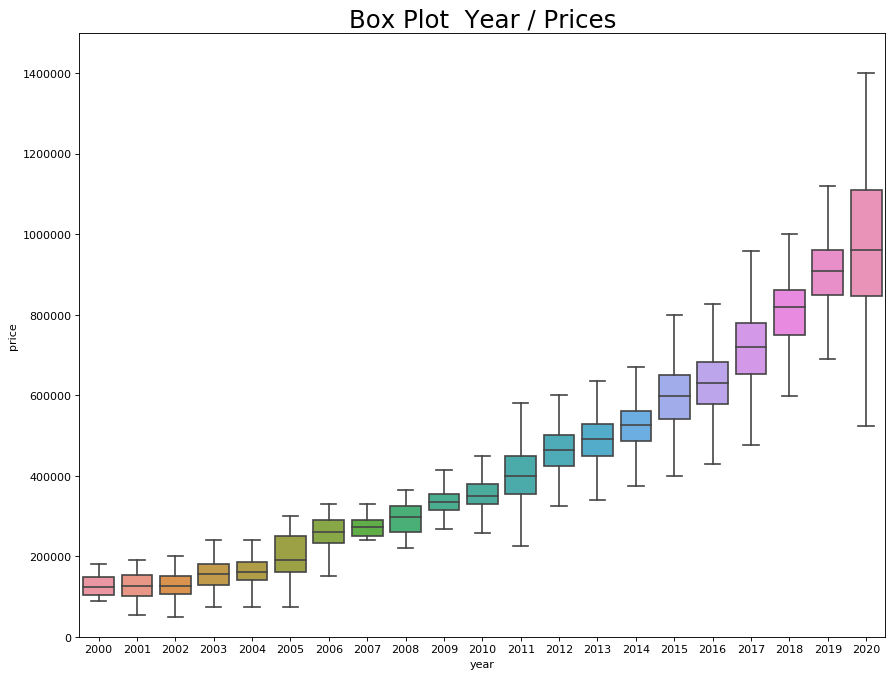

In [205]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

## Алгоритм CatBoost

In [206]:
X = df.drop(['price'], axis=1)
y = df['price']

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 189862.1251020	total: 2.36ms	remaining: 1.89s
1:	learn: 185582.4562939	total: 4.45ms	remaining: 1.78s
2:	learn: 181671.8657048	total: 6.06ms	remaining: 1.61s
3:	learn: 177850.4477405	total: 7.23ms	remaining: 1.44s
4:	learn: 174161.4797942	total: 9.31ms	remaining: 1.48s
5:	learn: 170841.8155078	total: 10.5ms	remaining: 1.39s
6:	learn: 167263.2778545	total: 11.8ms	remaining: 1.33s
7:	learn: 163810.9494978	total: 13.1ms	remaining: 1.29s
8:	learn: 160575.8836873	total: 14.3ms	remaining: 1.26s
9:	learn: 157332.2717590	total: 16.2ms	remaining: 1.28s
10:	learn: 154228.2227335	total: 18.2ms	remaining: 1.3s
11:	learn: 151331.8679740	total: 19.5ms	remaining: 1.28s
12:	learn: 148297.1864869	total: 20.8ms	remaining: 1.26s
13:	learn: 145331.5703271	total: 22ms	remaining: 1.24s
14:	learn: 142696.8874514	total: 23.7ms	remaining: 1.24s
15:	learn: 139950.3773648	total: 24.9ms	remaining: 1.22s
16:	learn: 137335.5207155	total: 26.1ms	remaining: 1.2s
17:	learn: 134798.5761222	total: 27.7ms	remai

255:	learn: 51919.7534104	total: 318ms	remaining: 676ms
256:	learn: 51903.8327964	total: 321ms	remaining: 677ms
257:	learn: 51888.9033005	total: 321ms	remaining: 675ms
258:	learn: 51872.9486051	total: 323ms	remaining: 676ms
259:	learn: 51858.2394121	total: 325ms	remaining: 676ms
260:	learn: 51851.2831205	total: 327ms	remaining: 676ms
261:	learn: 51841.1660422	total: 329ms	remaining: 675ms
262:	learn: 51824.3585966	total: 330ms	remaining: 674ms
263:	learn: 51812.7052808	total: 331ms	remaining: 671ms
264:	learn: 51804.8490064	total: 332ms	remaining: 670ms
265:	learn: 51789.4282620	total: 333ms	remaining: 669ms
266:	learn: 51780.1113675	total: 334ms	remaining: 667ms
267:	learn: 51763.9011931	total: 335ms	remaining: 666ms
268:	learn: 51750.8305748	total: 336ms	remaining: 664ms
269:	learn: 51732.2799659	total: 338ms	remaining: 663ms
270:	learn: 51713.1088656	total: 339ms	remaining: 662ms
271:	learn: 51702.2672249	total: 341ms	remaining: 662ms
272:	learn: 51692.8029392	total: 342ms	remaining

410:	learn: 50749.9107756	total: 472ms	remaining: 447ms
411:	learn: 50749.6735464	total: 473ms	remaining: 445ms
412:	learn: 50741.3178053	total: 475ms	remaining: 445ms
413:	learn: 50737.0180621	total: 475ms	remaining: 443ms
414:	learn: 50731.2001996	total: 477ms	remaining: 443ms
415:	learn: 50729.4776905	total: 478ms	remaining: 441ms
416:	learn: 50713.9972031	total: 480ms	remaining: 441ms
417:	learn: 50710.1543041	total: 480ms	remaining: 439ms
418:	learn: 50705.1262729	total: 482ms	remaining: 438ms
419:	learn: 50703.7936665	total: 482ms	remaining: 436ms
420:	learn: 50701.8707982	total: 483ms	remaining: 435ms
421:	learn: 50701.2714959	total: 483ms	remaining: 433ms
422:	learn: 50696.2362566	total: 484ms	remaining: 431ms
423:	learn: 50694.6508049	total: 485ms	remaining: 430ms
424:	learn: 50687.3693633	total: 486ms	remaining: 429ms
425:	learn: 50678.9481930	total: 487ms	remaining: 427ms
426:	learn: 50677.6409048	total: 487ms	remaining: 426ms
427:	learn: 50672.8322392	total: 488ms	remaining

614:	learn: 49943.8553750	total: 622ms	remaining: 187ms
615:	learn: 49943.6422795	total: 623ms	remaining: 186ms
616:	learn: 49942.9351309	total: 624ms	remaining: 185ms
617:	learn: 49937.7405047	total: 624ms	remaining: 184ms
618:	learn: 49928.2406796	total: 625ms	remaining: 183ms
619:	learn: 49928.0318569	total: 626ms	remaining: 182ms
620:	learn: 49918.8930307	total: 627ms	remaining: 181ms
621:	learn: 49913.9914695	total: 628ms	remaining: 180ms
622:	learn: 49908.1144032	total: 629ms	remaining: 179ms
623:	learn: 49900.7008992	total: 629ms	remaining: 178ms
624:	learn: 49894.5652707	total: 631ms	remaining: 177ms
625:	learn: 49889.9463593	total: 632ms	remaining: 176ms
626:	learn: 49889.7399181	total: 633ms	remaining: 175ms
627:	learn: 49887.9134334	total: 634ms	remaining: 174ms
628:	learn: 49881.6359417	total: 635ms	remaining: 173ms
629:	learn: 49881.4379186	total: 635ms	remaining: 171ms
630:	learn: 49872.4784570	total: 636ms	remaining: 170ms
631:	learn: 49871.2925262	total: 638ms	remaining

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9276985951555984

 The best parameters across ALL searched params:
 {'depth': 3, 'iterations': 800, 'learning_rate': 0.03, 'subsample': 1}



In [208]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=1,
                          depth=3)

In [209]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 189862.1251020	total: 2.88ms	remaining: 2.3s
1:	learn: 185582.4562939	total: 5.95ms	remaining: 2.37s
2:	learn: 181671.8657048	total: 8.35ms	remaining: 2.22s
3:	learn: 177850.4477405	total: 10.1ms	remaining: 2.02s
4:	learn: 174161.4797942	total: 12.9ms	remaining: 2.05s
5:	learn: 170841.8155078	total: 14.3ms	remaining: 1.9s
6:	learn: 167263.2778545	total: 15.9ms	remaining: 1.81s
7:	learn: 163810.9494978	total: 17.4ms	remaining: 1.72s
8:	learn: 160575.8836873	total: 18.9ms	remaining: 1.66s
9:	learn: 157332.2717590	total: 20.8ms	remaining: 1.64s
10:	learn: 154228.2227335	total: 22.9ms	remaining: 1.64s
11:	learn: 151331.8679740	total: 24.4ms	remaining: 1.6s
12:	learn: 148297.1864869	total: 25.8ms	remaining: 1.56s
13:	learn: 145331.5703271	total: 27.3ms	remaining: 1.53s
14:	learn: 142696.8874514	total: 29.2ms	remaining: 1.53s
15:	learn: 139950.3773648	total: 31ms	remaining: 1.52s
16:	learn: 137335.5207155	total: 32.8ms	remaining: 1.51s
17:	learn: 134798.5761222	total: 34.9ms	remain

175:	learn: 53662.4429411	total: 308ms	remaining: 1.09s
176:	learn: 53625.2328477	total: 310ms	remaining: 1.09s
177:	learn: 53580.0679614	total: 311ms	remaining: 1.09s
178:	learn: 53526.9255510	total: 312ms	remaining: 1.08s
179:	learn: 53508.7285641	total: 314ms	remaining: 1.08s
180:	learn: 53481.6555301	total: 315ms	remaining: 1.08s
181:	learn: 53443.5499928	total: 317ms	remaining: 1.08s
182:	learn: 53396.1540201	total: 318ms	remaining: 1.07s
183:	learn: 53362.5731712	total: 320ms	remaining: 1.07s
184:	learn: 53312.9006805	total: 320ms	remaining: 1.06s
185:	learn: 53273.3898214	total: 323ms	remaining: 1.06s
186:	learn: 53230.9402968	total: 324ms	remaining: 1.06s
187:	learn: 53197.6060355	total: 326ms	remaining: 1.06s
188:	learn: 53179.4165425	total: 327ms	remaining: 1.06s
189:	learn: 53141.1768490	total: 329ms	remaining: 1.06s
190:	learn: 53123.7673418	total: 331ms	remaining: 1.05s
191:	learn: 53083.8065779	total: 332ms	remaining: 1.05s
192:	learn: 53056.9026803	total: 334ms	remaining

419:	learn: 50703.7936665	total: 619ms	remaining: 560ms
420:	learn: 50701.8707982	total: 620ms	remaining: 558ms
421:	learn: 50701.2714959	total: 620ms	remaining: 556ms
422:	learn: 50696.2362566	total: 621ms	remaining: 554ms
423:	learn: 50694.6508049	total: 622ms	remaining: 551ms
424:	learn: 50687.3693633	total: 623ms	remaining: 550ms
425:	learn: 50678.9481930	total: 624ms	remaining: 548ms
426:	learn: 50677.6409048	total: 625ms	remaining: 546ms
427:	learn: 50672.8322392	total: 625ms	remaining: 544ms
428:	learn: 50670.4884393	total: 627ms	remaining: 542ms
429:	learn: 50666.9558739	total: 627ms	remaining: 540ms
430:	learn: 50662.3436567	total: 628ms	remaining: 538ms
431:	learn: 50653.3965714	total: 629ms	remaining: 536ms
432:	learn: 50652.0928466	total: 630ms	remaining: 534ms
433:	learn: 50647.6351640	total: 631ms	remaining: 532ms
434:	learn: 50644.4864765	total: 632ms	remaining: 530ms
435:	learn: 50639.8902685	total: 632ms	remaining: 528ms
436:	learn: 50625.7163861	total: 634ms	remaining

573:	learn: 50074.1830958	total: 765ms	remaining: 301ms
574:	learn: 50068.1562935	total: 766ms	remaining: 300ms
575:	learn: 50063.5648813	total: 766ms	remaining: 298ms
576:	learn: 50062.8353660	total: 767ms	remaining: 296ms
577:	learn: 50056.0380621	total: 768ms	remaining: 295ms
578:	learn: 50050.8856603	total: 769ms	remaining: 293ms
579:	learn: 50049.8631601	total: 769ms	remaining: 292ms
580:	learn: 50049.1532393	total: 770ms	remaining: 290ms
581:	learn: 50038.4821030	total: 771ms	remaining: 289ms
582:	learn: 50036.9371614	total: 771ms	remaining: 287ms
583:	learn: 50031.6659209	total: 773ms	remaining: 286ms
584:	learn: 50031.3922770	total: 774ms	remaining: 284ms
585:	learn: 50031.1991559	total: 775ms	remaining: 283ms
586:	learn: 50031.0117946	total: 776ms	remaining: 281ms
587:	learn: 50029.6941968	total: 777ms	remaining: 280ms
588:	learn: 50028.1296552	total: 778ms	remaining: 279ms
589:	learn: 50025.0417021	total: 778ms	remaining: 277ms
590:	learn: 50019.2159602	total: 779ms	remaining

750:	learn: 49488.4806758	total: 913ms	remaining: 59.6ms
751:	learn: 49488.3445054	total: 914ms	remaining: 58.3ms
752:	learn: 49486.9680028	total: 915ms	remaining: 57.1ms
753:	learn: 49482.5595775	total: 916ms	remaining: 55.9ms
754:	learn: 49482.4265813	total: 916ms	remaining: 54.6ms
755:	learn: 49482.0940324	total: 917ms	remaining: 53.4ms
756:	learn: 49481.8763380	total: 918ms	remaining: 52.1ms
757:	learn: 49481.1139649	total: 918ms	remaining: 50.9ms
758:	learn: 49480.3583063	total: 920ms	remaining: 49.7ms
759:	learn: 49479.6325909	total: 920ms	remaining: 48.4ms
760:	learn: 49476.3237166	total: 921ms	remaining: 47.2ms
761:	learn: 49472.6000729	total: 924ms	remaining: 46.1ms
762:	learn: 49466.6093105	total: 924ms	remaining: 44.8ms
763:	learn: 49465.2698964	total: 925ms	remaining: 43.6ms
764:	learn: 49463.6335783	total: 926ms	remaining: 42.4ms
765:	learn: 49462.6809740	total: 927ms	remaining: 41.1ms
766:	learn: 49461.2852826	total: 928ms	remaining: 39.9ms
767:	learn: 49460.7036387	total

In [210]:
# Get predictions
preds = model.predict(X_test)

In [211]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 52587.921284


In [212]:
# создадим фрейм под именем avito_ru_set

avito_ru_set = df

In [213]:
auto_ru_set

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,410000
...,...,...,...,...,...,...,...,...
1216,Kia Rio III Рестайлинг,2015,170000,седан,123,механическая,3 или более,510000
1217,Kia Rio III Рестайлинг,2016,250000,седан,123,механическая,2 владельца,599000
1218,Kia Rio III,2014,228000,седан,123,механическая,2 владельца,430000
1219,Kia Rio III,2015,188600,седан,107,механическая,2 владельца,460000


In [214]:
drom_ru_set

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio II Рестайлинг,2011,125589,седан,95,автоматическая,1 владелец,364000
1,Kia Rio III,2012,149829,хэтчбек 5 дв.,107,механическая,3 или более,375000
3,Kia Rio III Рестайлинг,2016,70000,хэтчбек 5 дв.,107,автоматическая,2 владельца,597000
8,Kia Rio III Рестайлинг,2016,101000,седан,107,автоматическая,1 владелец,640000
10,Kia Rio IV,2017,63000,седан,123,механическая,1 владелец,759000
...,...,...,...,...,...,...,...,...
1990,Kia Rio II Рестайлинг,2010,150000,хэтчбек 5 дв.,95,механическая,3 или более,340000
1991,Kia Rio III,2012,144000,седан,123,автоматическая,3 или более,479000
1993,Kia Rio III,2012,144000,седан,123,механическая,2 владельца,460000
1996,Kia Rio III Рестайлинг,2016,29000,хэтчбек 5 дв.,123,механическая,3 или более,545000


In [215]:
avito_ru_set

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio II Рестайлинг,2009,169700,седан,97,автоматическая,3 или более,340000
1,Kia Rio II,2007,290000,седан,97,автоматическая,2 владельца,290000
2,Kia Rio III,2011,132000,седан,123,автоматическая,3 или более,485000
3,Kia Rio III,2012,93000,хэтчбек 5 дв.,123,механическая,1 владелец,450000
4,Kia Rio III,2012,150000,седан,107,механическая,3 или более,429000
...,...,...,...,...,...,...,...,...
4702,Kia Rio I,2001,124000,седан,108,автоматическая,3 или более,165000
4703,Kia Rio III,2012,131000,хэтчбек 5 дв.,123,механическая,2 владельца,485000
4704,Kia Rio IV,2018,77000,седан,123,механическая,1 владелец,850000
4705,Kia Rio III,2013,98000,хэтчбек 5 дв.,123,механическая,2 владельца,497000


In [216]:
# объединим все три фрейма в один

In [217]:
new_df = pd.concat([auto_ru_set, drom_ru_set, avito_ru_set], ignore_index=True)

In [218]:
new_df.shape

(6186, 8)

In [219]:
# удалим дубликаты

new_df = new_df.drop_duplicates()

In [220]:
new_df.shape

(5884, 8)

In [221]:
# Итак, мы получили один итоговый датафрейм, соединив три фрейма с разных площадок

In [222]:
df = new_df

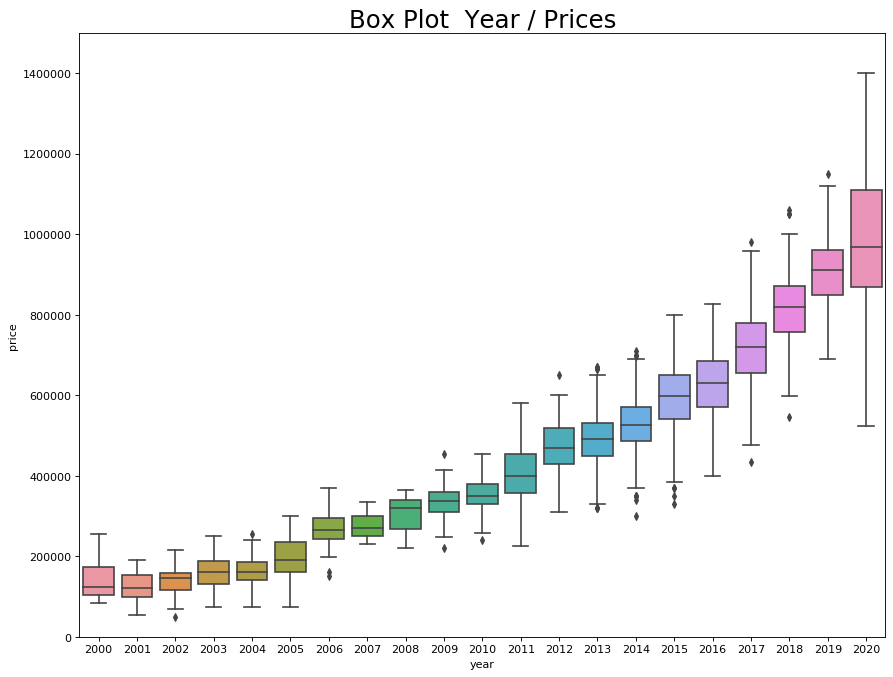

In [223]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [224]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

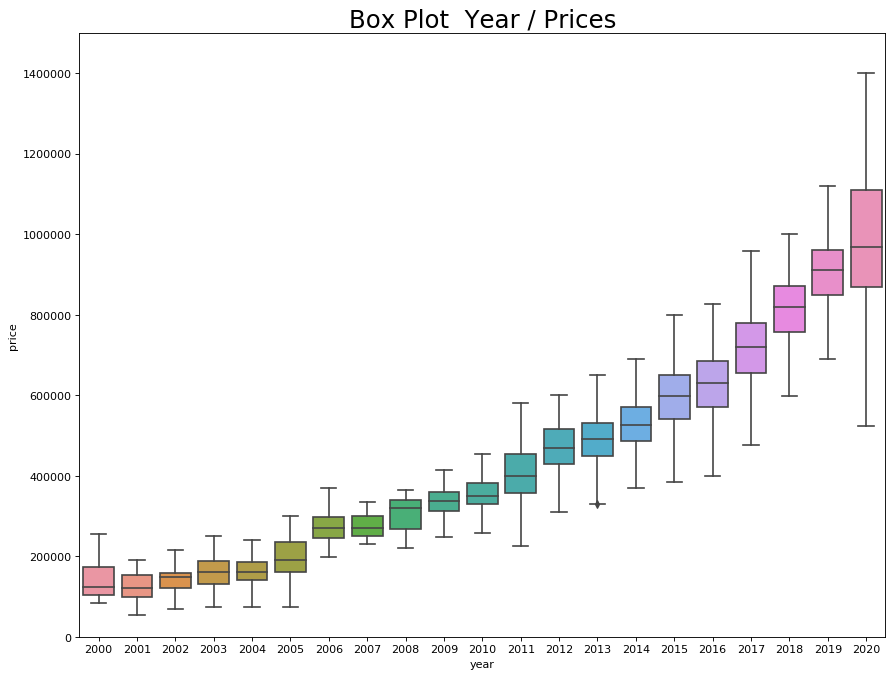

In [225]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [226]:
X = df.drop(['price'], axis=1)
y = df['price']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 189144.3331789	total: 3.92ms	remaining: 3.13s
1:	learn: 184808.3814531	total: 7.04ms	remaining: 2.81s
2:	learn: 180452.6824687	total: 10.4ms	remaining: 2.77s
3:	learn: 176236.1363906	total: 12.3ms	remaining: 2.45s
4:	learn: 172267.4693978	total: 14.7ms	remaining: 2.34s
5:	learn: 168256.9463135	total: 17.1ms	remaining: 2.26s
6:	learn: 164610.5303546	total: 20.1ms	remaining: 2.28s
7:	learn: 161052.9015638	total: 23.2ms	remaining: 2.3s
8:	learn: 157629.4424313	total: 25.7ms	remaining: 2.25s
9:	learn: 154172.9281418	total: 28ms	remaining: 2.21s
10:	learn: 150948.8373861	total: 30.9ms	remaining: 2.22s
11:	learn: 147711.5816274	total: 33.8ms	remaining: 2.22s
12:	learn: 144535.1325256	total: 36.2ms	remaining: 2.19s
13:	learn: 141487.0392373	total: 38.8ms	remaining: 2.18s
14:	learn: 138591.3836920	total: 41.6ms	remaining: 2.18s
15:	learn: 135772.5858997	total: 43.5ms	remaining: 2.13s
16:	learn: 133111.5951517	total: 46.4ms	remaining: 2.14s
17:	learn: 130455.4963049	total: 49.8ms	rema

203:	learn: 53064.1236434	total: 505ms	remaining: 1.47s
204:	learn: 53054.6854889	total: 507ms	remaining: 1.47s
205:	learn: 53054.6850673	total: 508ms	remaining: 1.46s
206:	learn: 53028.1400785	total: 511ms	remaining: 1.46s
207:	learn: 53014.4539398	total: 513ms	remaining: 1.46s
208:	learn: 52997.0192032	total: 516ms	remaining: 1.46s
209:	learn: 52983.1637597	total: 518ms	remaining: 1.45s
210:	learn: 52969.3354101	total: 520ms	remaining: 1.45s
211:	learn: 52953.4212038	total: 523ms	remaining: 1.45s
212:	learn: 52939.9142364	total: 525ms	remaining: 1.45s
213:	learn: 52917.1838552	total: 528ms	remaining: 1.45s
214:	learn: 52905.7541937	total: 530ms	remaining: 1.44s
215:	learn: 52895.1068545	total: 532ms	remaining: 1.44s
216:	learn: 52887.5424198	total: 535ms	remaining: 1.44s
217:	learn: 52857.0464372	total: 538ms	remaining: 1.44s
218:	learn: 52838.0087030	total: 541ms	remaining: 1.43s
219:	learn: 52828.3731104	total: 543ms	remaining: 1.43s
220:	learn: 52817.5427059	total: 545ms	remaining

418:	learn: 51156.5736936	total: 1s	remaining: 912ms
419:	learn: 51152.9199777	total: 1s	remaining: 909ms
420:	learn: 51147.6402981	total: 1.01s	remaining: 908ms
421:	learn: 51142.1248192	total: 1.01s	remaining: 904ms
422:	learn: 51135.7384830	total: 1.01s	remaining: 902ms
423:	learn: 51121.7667867	total: 1.01s	remaining: 900ms
424:	learn: 51116.8714800	total: 1.02s	remaining: 898ms
425:	learn: 51109.7748145	total: 1.02s	remaining: 896ms
426:	learn: 51102.6855942	total: 1.02s	remaining: 893ms
427:	learn: 51096.4994686	total: 1.02s	remaining: 891ms
428:	learn: 51089.0282006	total: 1.03s	remaining: 888ms
429:	learn: 51085.6826858	total: 1.03s	remaining: 886ms
430:	learn: 51078.7982997	total: 1.03s	remaining: 884ms
431:	learn: 51071.8100732	total: 1.03s	remaining: 882ms
432:	learn: 51067.2578437	total: 1.04s	remaining: 879ms
433:	learn: 51056.3082484	total: 1.04s	remaining: 877ms
434:	learn: 51053.0781596	total: 1.04s	remaining: 875ms
435:	learn: 51049.1370444	total: 1.04s	remaining: 873m

622:	learn: 50364.3080626	total: 1.51s	remaining: 428ms
623:	learn: 50360.4153615	total: 1.51s	remaining: 426ms
624:	learn: 50357.0286505	total: 1.51s	remaining: 423ms
625:	learn: 50355.6121057	total: 1.51s	remaining: 421ms
626:	learn: 50353.4811252	total: 1.52s	remaining: 419ms
627:	learn: 50350.9228847	total: 1.52s	remaining: 416ms
628:	learn: 50348.3756764	total: 1.52s	remaining: 414ms
629:	learn: 50345.2761517	total: 1.52s	remaining: 412ms
630:	learn: 50342.4717437	total: 1.53s	remaining: 409ms
631:	learn: 50340.1939107	total: 1.53s	remaining: 407ms
632:	learn: 50334.2291625	total: 1.53s	remaining: 404ms
633:	learn: 50332.8636520	total: 1.53s	remaining: 402ms
634:	learn: 50331.2666474	total: 1.54s	remaining: 400ms
635:	learn: 50329.9633517	total: 1.54s	remaining: 397ms
636:	learn: 50325.5819670	total: 1.54s	remaining: 395ms
637:	learn: 50322.2552880	total: 1.54s	remaining: 392ms
638:	learn: 50318.8396578	total: 1.55s	remaining: 390ms
639:	learn: 50312.4886430	total: 1.55s	remaining

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9240820874465268

 The best parameters across ALL searched params:
 {'depth': 4, 'iterations': 800, 'learning_rate': 0.03, 'subsample': 0.5}



In [228]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=0.5,
                          depth=4)

In [229]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 189144.3331789	total: 5.67ms	remaining: 4.53s
1:	learn: 184808.3814531	total: 9.55ms	remaining: 3.81s
2:	learn: 180452.6824687	total: 14.1ms	remaining: 3.74s
3:	learn: 176236.1363906	total: 16.4ms	remaining: 3.27s
4:	learn: 172267.4693978	total: 19.5ms	remaining: 3.1s
5:	learn: 168256.9463135	total: 24ms	remaining: 3.18s
6:	learn: 164610.5303546	total: 30.6ms	remaining: 3.47s
7:	learn: 161052.9015638	total: 35ms	remaining: 3.46s
8:	learn: 157629.4424313	total: 38.8ms	remaining: 3.41s
9:	learn: 154172.9281418	total: 42.7ms	remaining: 3.37s
10:	learn: 150948.8373861	total: 48.4ms	remaining: 3.47s
11:	learn: 147711.5816274	total: 53ms	remaining: 3.48s
12:	learn: 144535.1325256	total: 56.7ms	remaining: 3.43s
13:	learn: 141487.0392373	total: 60ms	remaining: 3.37s
14:	learn: 138591.3836920	total: 63.7ms	remaining: 3.33s
15:	learn: 135772.5858997	total: 66ms	remaining: 3.23s
16:	learn: 133111.5951517	total: 70.1ms	remaining: 3.23s
17:	learn: 130455.4963049	total: 74.5ms	remaining: 3

198:	learn: 53135.6582644	total: 670ms	remaining: 2.02s
199:	learn: 53129.9361905	total: 673ms	remaining: 2.02s
200:	learn: 53117.3958968	total: 675ms	remaining: 2.01s
201:	learn: 53107.5169719	total: 679ms	remaining: 2.01s
202:	learn: 53085.6227343	total: 682ms	remaining: 2s
203:	learn: 53064.1236434	total: 687ms	remaining: 2.01s
204:	learn: 53054.6854889	total: 691ms	remaining: 2s
205:	learn: 53054.6850673	total: 692ms	remaining: 1.99s
206:	learn: 53028.1400785	total: 697ms	remaining: 2s
207:	learn: 53014.4539398	total: 701ms	remaining: 2s
208:	learn: 52997.0192032	total: 704ms	remaining: 1.99s
209:	learn: 52983.1637597	total: 707ms	remaining: 1.99s
210:	learn: 52969.3354101	total: 709ms	remaining: 1.98s
211:	learn: 52953.4212038	total: 712ms	remaining: 1.98s
212:	learn: 52939.9142364	total: 715ms	remaining: 1.97s
213:	learn: 52917.1838552	total: 718ms	remaining: 1.97s
214:	learn: 52905.7541937	total: 721ms	remaining: 1.96s
215:	learn: 52895.1068545	total: 723ms	remaining: 1.96s
216:

365:	learn: 51432.9976321	total: 1.17s	remaining: 1.38s
366:	learn: 51431.5692448	total: 1.17s	remaining: 1.38s
367:	learn: 51427.1753662	total: 1.17s	remaining: 1.38s
368:	learn: 51421.2073361	total: 1.18s	remaining: 1.37s
369:	learn: 51416.3894898	total: 1.18s	remaining: 1.37s
370:	learn: 51405.7537916	total: 1.18s	remaining: 1.37s
371:	learn: 51401.8285282	total: 1.19s	remaining: 1.36s
372:	learn: 51396.2617036	total: 1.19s	remaining: 1.36s
373:	learn: 51390.6525767	total: 1.19s	remaining: 1.36s
374:	learn: 51381.8338162	total: 1.2s	remaining: 1.36s
375:	learn: 51380.4929879	total: 1.2s	remaining: 1.35s
376:	learn: 51367.8461994	total: 1.2s	remaining: 1.35s
377:	learn: 51364.7396912	total: 1.21s	remaining: 1.35s
378:	learn: 51357.6854146	total: 1.21s	remaining: 1.34s
379:	learn: 51346.4414310	total: 1.21s	remaining: 1.34s
380:	learn: 51338.4731391	total: 1.22s	remaining: 1.34s
381:	learn: 51332.3747084	total: 1.22s	remaining: 1.33s
382:	learn: 51327.2822942	total: 1.22s	remaining: 1

538:	learn: 50615.1539507	total: 1.67s	remaining: 809ms
539:	learn: 50614.3628861	total: 1.68s	remaining: 807ms
540:	learn: 50611.7104722	total: 1.68s	remaining: 805ms
541:	learn: 50607.8732253	total: 1.68s	remaining: 801ms
542:	learn: 50604.8539694	total: 1.69s	remaining: 799ms
543:	learn: 50598.2799621	total: 1.69s	remaining: 797ms
544:	learn: 50595.6664265	total: 1.7s	remaining: 795ms
545:	learn: 50593.8128039	total: 1.7s	remaining: 792ms
546:	learn: 50589.9657821	total: 1.71s	remaining: 789ms
547:	learn: 50587.2913234	total: 1.71s	remaining: 786ms
548:	learn: 50585.8139429	total: 1.71s	remaining: 783ms
549:	learn: 50584.1899030	total: 1.72s	remaining: 780ms
550:	learn: 50580.4564217	total: 1.72s	remaining: 776ms
551:	learn: 50576.7137708	total: 1.72s	remaining: 774ms
552:	learn: 50570.2648620	total: 1.73s	remaining: 771ms
553:	learn: 50568.5730420	total: 1.73s	remaining: 768ms
554:	learn: 50567.0280951	total: 1.73s	remaining: 765ms
555:	learn: 50566.4686014	total: 1.74s	remaining: 

701:	learn: 50133.1262736	total: 2.17s	remaining: 304ms
702:	learn: 50129.3702301	total: 2.18s	remaining: 300ms
703:	learn: 50128.9115513	total: 2.18s	remaining: 297ms
704:	learn: 50125.7406144	total: 2.18s	remaining: 294ms
705:	learn: 50123.2430002	total: 2.19s	remaining: 291ms
706:	learn: 50121.1419867	total: 2.19s	remaining: 288ms
707:	learn: 50116.6312282	total: 2.19s	remaining: 285ms
708:	learn: 50114.0049588	total: 2.2s	remaining: 282ms
709:	learn: 50110.1023719	total: 2.2s	remaining: 279ms
710:	learn: 50109.1976964	total: 2.21s	remaining: 276ms
711:	learn: 50103.0540755	total: 2.21s	remaining: 273ms
712:	learn: 50102.8039231	total: 2.21s	remaining: 270ms
713:	learn: 50099.3508913	total: 2.21s	remaining: 267ms
714:	learn: 50096.9277202	total: 2.21s	remaining: 263ms
715:	learn: 50093.3850668	total: 2.22s	remaining: 260ms
716:	learn: 50092.5152413	total: 2.22s	remaining: 257ms
717:	learn: 50089.7021767	total: 2.23s	remaining: 254ms
718:	learn: 50084.9961598	total: 2.23s	remaining: 

In [230]:
# Get predictions
preds = model.predict(X_test)

In [231]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 52146.025785


In [245]:
# посмотрим для интереса стоимость моего автомобиля

In [236]:
my_df = pd.DataFrame({'model': ['Kia Rio III Рестайлинг'], 'year': [2015], 'km_age': [68000],
                      'body_type': ['седан'], 'engine_power': [123],
                     'transmission': ['автоматическая'], 'owners_count': ['1 владелец']})

In [237]:
my_df

,model,year,km_age,body_type,engine_power,transmission,owners_count
0,Kia Rio III Рестайлинг,2015,68000,седан,123,автоматическая,1 владелец


In [238]:
my_preds = model.predict(my_df)

In [239]:
my_preds

array([669167.24974777])